# Raja Muhammad Huzaifa
## B21f0157AI022
## Lab # 2

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
super_data = pd.read_csv('SuperStoreOrders.csv', encoding='latin-1')


super_data.sales.replace('\D', '', regex=True, inplace=True)
super_data['sales'] = super_data['sales'].astype('int64')
super_data['profit'] = super_data['profit'].astype('int64')

#years to objects since datetime is not relevant to our analysis
super_data['year'] = super_data['year'].astype('object')
super_data.info()
#no null values in this dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿order_id     51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  int64  
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [3]:
super_data.head()

,ï»¿order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37,4.70,Medium,2011


# Aims of EDA:
* Detemine profitability of the business
* Analyse factors impacting profits by considering promising markets, regions, customer segments and inventory
* Prepare summary observations and recommendations in terms of profit loss

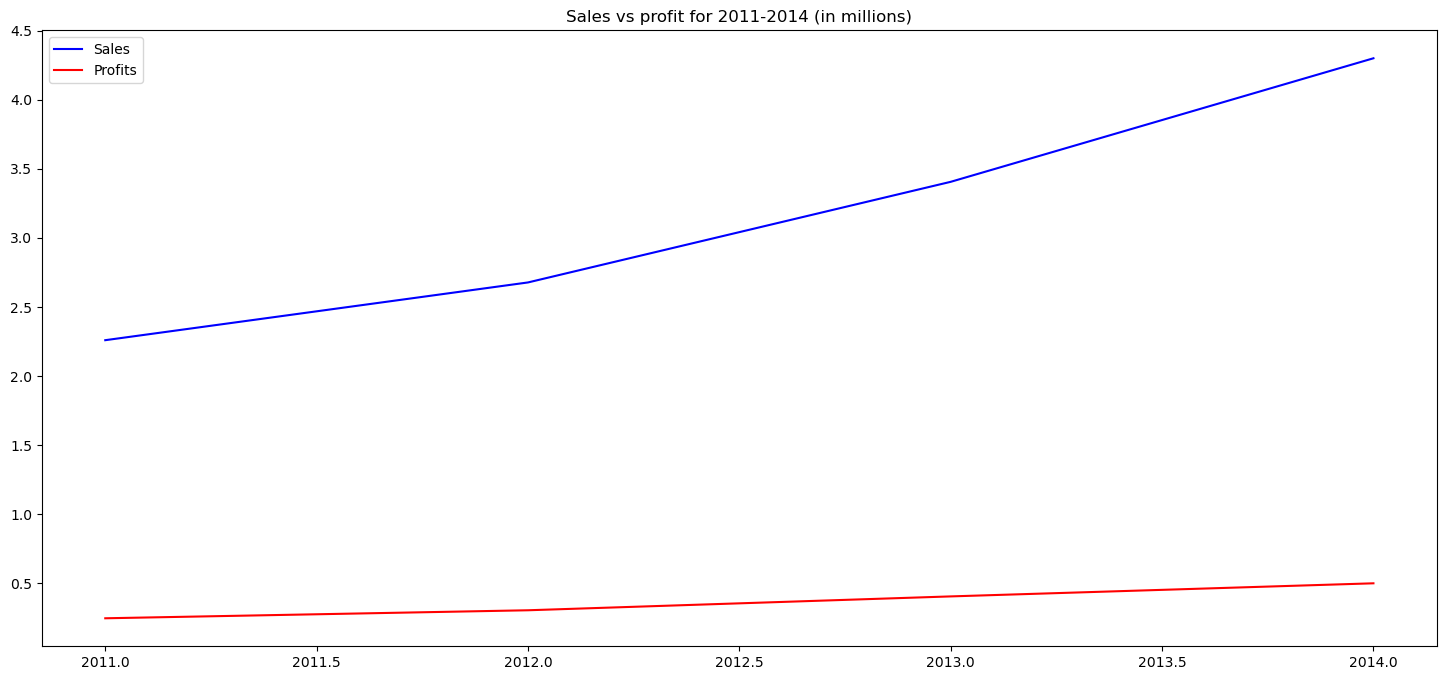

In [4]:
#Annual sales and profits

sales_ann = super_data.groupby('year')['sales'].sum().reset_index()
profit_ann = super_data.groupby('year')['profit'].sum().reset_index()

plt.figure(figsize=[18,8])
plt.title("Sales vs profit for 2011-2014 (in millions)")
plt.plot(sales_ann['year'], sales_ann['sales'] /1000000, color='blue')
plt.plot(profit_ann['year'], profit_ann['profit'] / 1000000, color='red')
plt.legend(['Sales', 'Profits'])
plt.show()

There is healthy growth in sales but the profits are less pronounced and there is an increasing gap between them, nearing approximately 3.8 million in 2014.

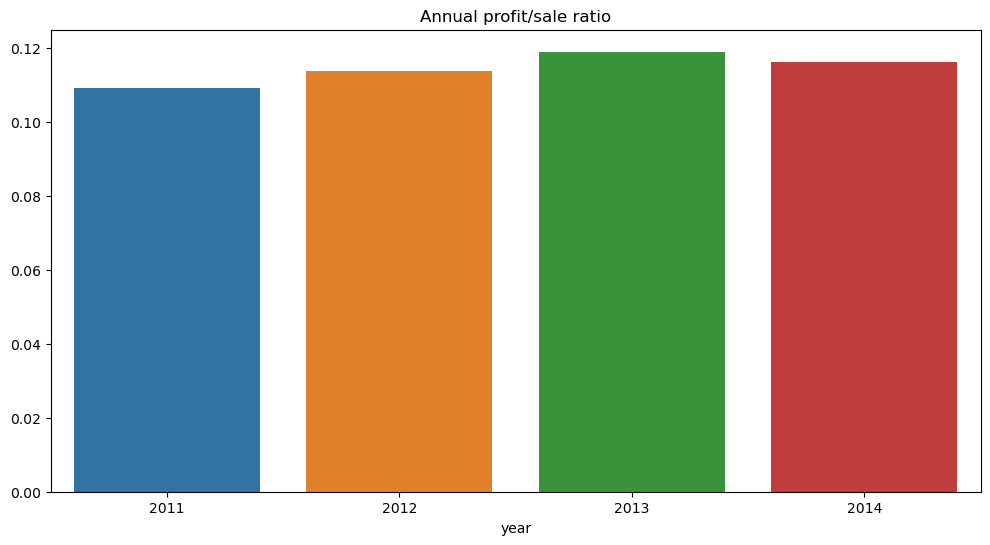

In [5]:
prof_by_sale = profit_ann['profit'] / sales_ann['sales']

plt.figure(figsize=[12,6])
sns.barplot(y=prof_by_sale, x=sales_ann['year'])
plt.title("Annual profit/sale ratio")
plt.show()

The profit-to-sale ratio even decreased slighly in 2014, after growing steadily for the previous 3 years.

# Regional and market analysis of profit loss. Country-level analysis of problematic areas.

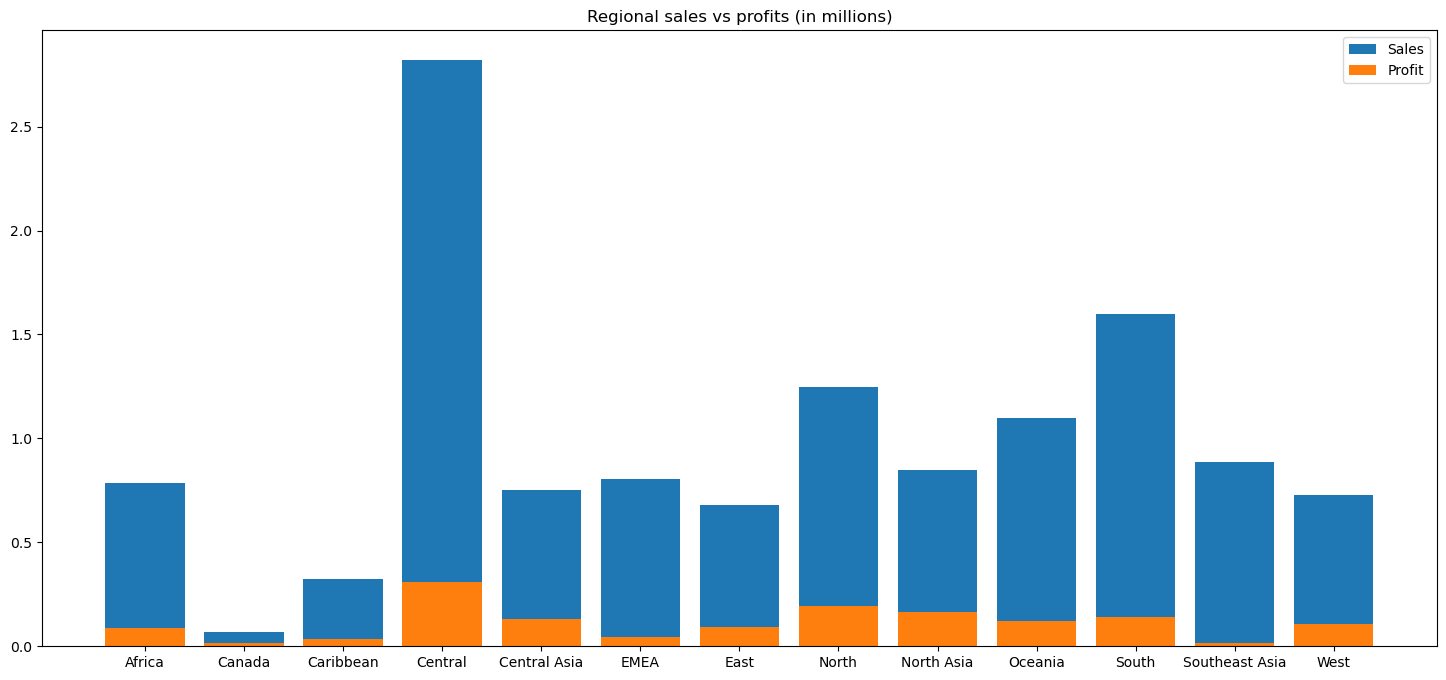

In [6]:
# total regional profits and sales

regions_profits = super_data.groupby('region')['profit'].sum().reset_index()
regions_sales = super_data.groupby('region')['sales'].sum().reset_index()

plt.figure(figsize=[18,8])
plt.bar(regions_sales['region'], regions_sales['sales']/ 1000000)
plt.bar(regions_profits['region'], regions_profits['profit']/ 1000000)
plt.legend(['Sales', 'Profit'])
plt.title("Regional sales vs profits (in millions)")
plt.show()

The biggest discrepancy between sales and profits is observed in EMEA, Southeast Asia and the South.The best results are shown by Canada, North and central Asia, and the Northern region. 

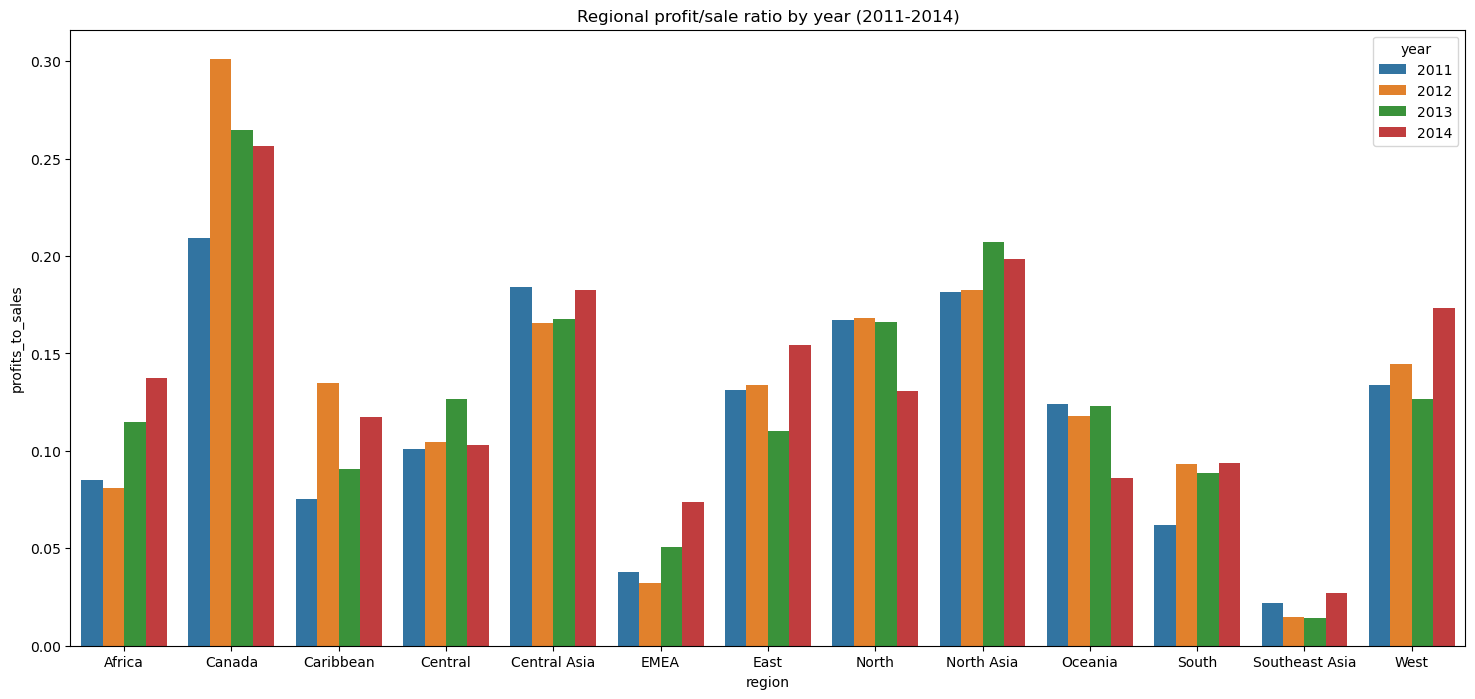

In [7]:
#profits vs sales in regions by year
regions_profits_ann = super_data.groupby(['region', 'year'])['profit'].sum().reset_index()
regions_sales_ann = super_data.groupby(['region', 'year'])['sales'].sum().reset_index()
reg_profits_to_sales_ann = regions_profits_ann['profit'] / regions_sales_ann['sales']
regions_sales_ann['profits'] = regions_profits_ann['profit']
regions_sales_ann['profits_to_sales'] = reg_profits_to_sales_ann

plt.figure(figsize=[18,8])
sns.barplot(data=regions_sales_ann, x='region', y='profits_to_sales', hue='year')
plt.title('Regional profit/sale ratio by year (2011-2014)')
plt.show()

There are five regions that display a fall in profits-to-sales in 2014: Canada, Central, North, North Asia, Oceania. For more information it might be useful to analyse the *markets? countries* as well.

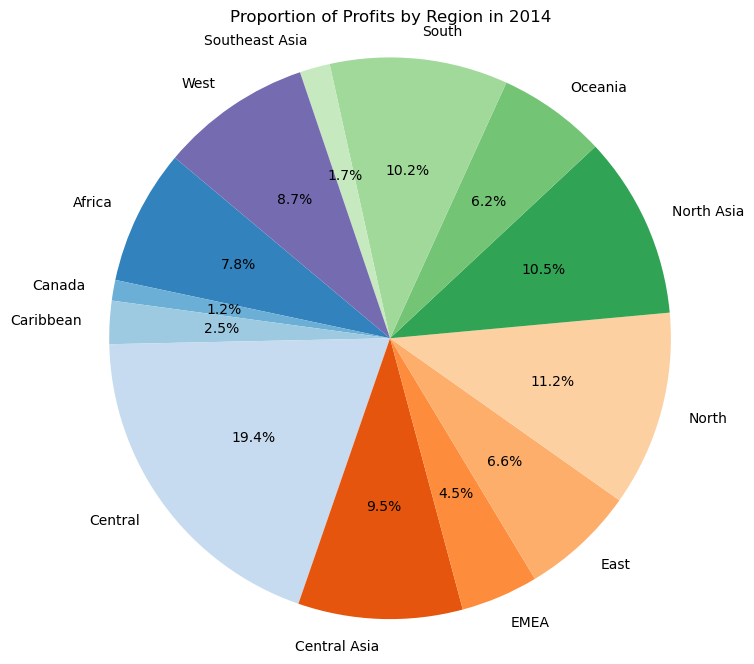

In [8]:

# Filter the data for a specific year, let's say 2014
year_data = regions_sales_ann[regions_sales_ann['year'] == 2014]

# Calculate total profits and sales for 2014 across regions
total_profits_2014 = year_data['profits'].sum()
total_sales_2014 = year_data['sales'].sum()

# Create a pie plot
labels = year_data['region']
sizes = year_data['profits'] / total_profits_2014  # Using profit proportions for sizes
colors = plt.cm.tab20c.colors  # Using a color palette

plt.figure(figsize=[8, 8])
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Profits by Region in 2014')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

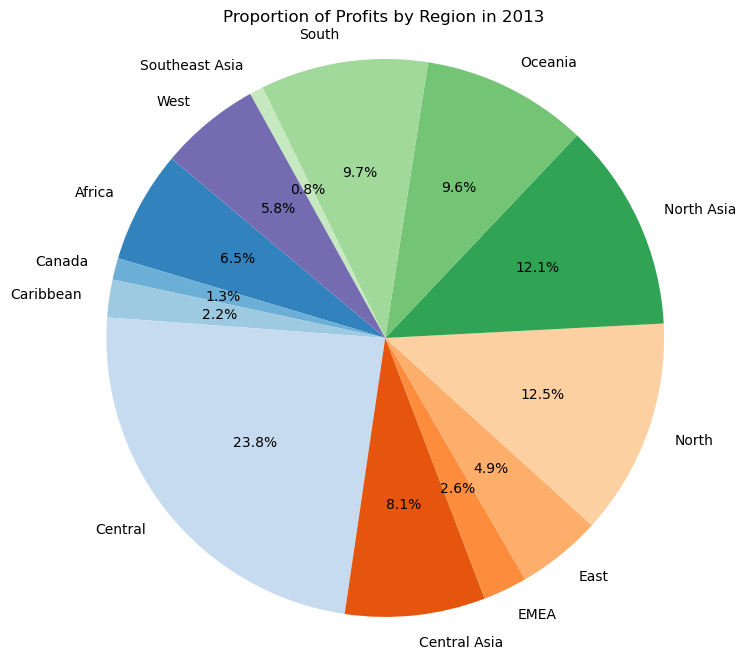

In [9]:

# Filter the data for a specific year, let's say 2013
year_data = regions_sales_ann[regions_sales_ann['year'] == 2013]

# Calculate total profits and sales for 2014 across regions
total_profits_2014 = year_data['profits'].sum()
total_sales_2014 = year_data['sales'].sum()

# Create a pie plot
labels = year_data['region']
sizes = year_data['profits'] / total_profits_2014  # Using profit proportions for sizes
colors = plt.cm.tab20c.colors  # Using a color palette

plt.figure(figsize=[8, 8])
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Profits by Region in 2013')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

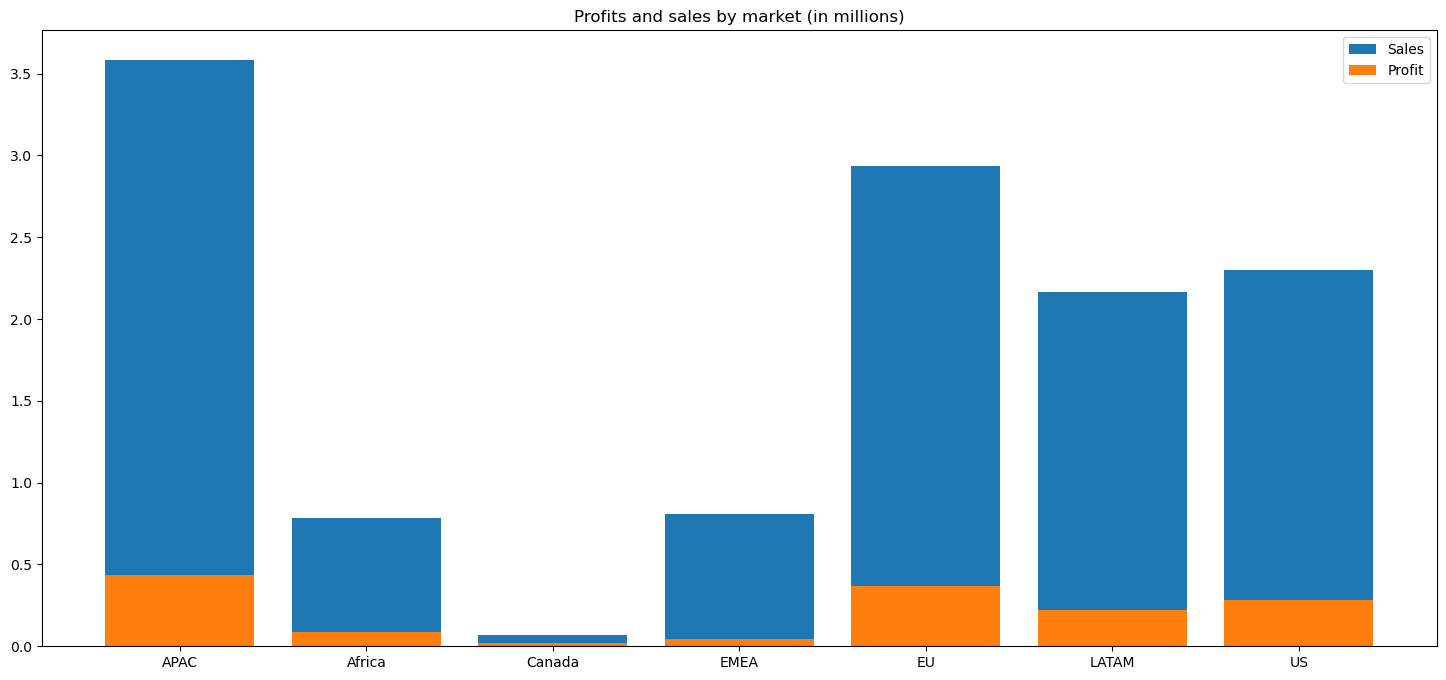

In [10]:
#sales and profits by market
markets_sales = super_data.groupby('market')['sales'].sum().reset_index()
markets_profits = super_data.groupby('market')['profit'].sum().reset_index()

plt.figure(figsize=[18,8])
plt.bar(markets_sales['market'], markets_sales['sales'] / 1000000)
plt.bar(markets_profits['market'], markets_profits['profit'] / 1000000)
plt.legend(['Sales', 'Profit'])
plt.title("Profits and sales by market (in millions)")
plt.show()

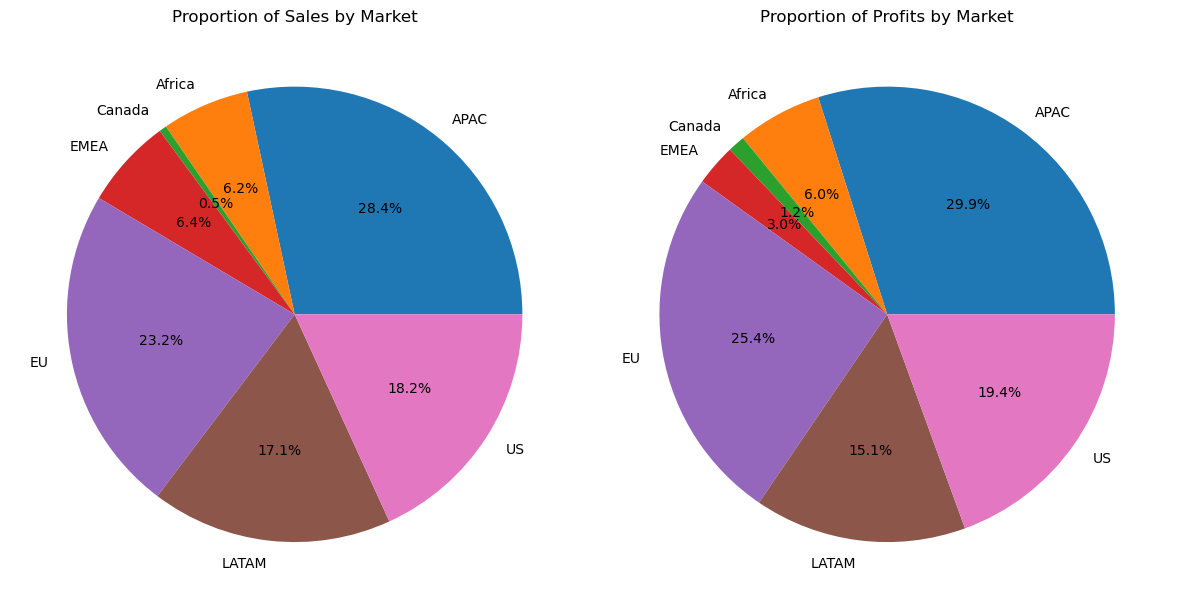

In [11]:
# Calculate total sales and profits across markets
total_sales = markets_sales['sales'].sum()
total_profits = markets_profits['profit'].sum()

# Calculate proportions for sales and profits
sales_proportions = markets_sales['sales'] / total_sales
profits_proportions = markets_profits['profit'] / total_profits

# Create pie charts for sales and profits
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Pie chart for sales
axes[0].pie(sales_proportions, labels=markets_sales['market'], autopct='%1.1f%%')
axes[0].set_title('Proportion of Sales by Market')

# Pie chart for profits
axes[1].pie(profits_proportions, labels=markets_profits['market'], autopct='%1.1f%%')
axes[1].set_title('Proportion of Profits by Market')

plt.tight_layout()
plt.show()

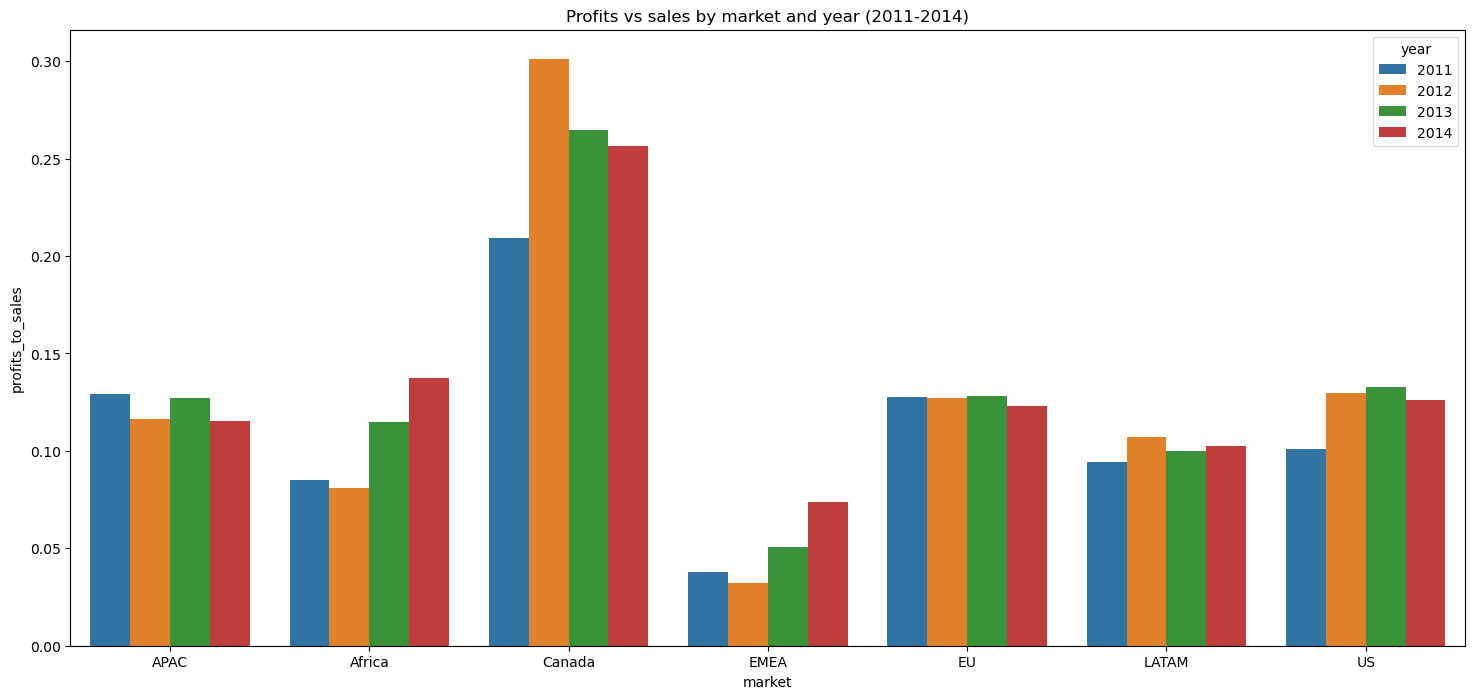

In [12]:
#ratio visualisation
markets_profits_ann = super_data.groupby(['market', 'year'])['profit'].sum().reset_index()
markets_sales_ann = super_data.groupby(['market', 'year'])['sales'].sum().reset_index()
m_profits_to_sales_ann = markets_profits_ann['profit'] / markets_sales_ann['sales']
markets_sales_ann['profits'] = markets_profits_ann['profit']
markets_sales_ann['profits_to_sales'] = m_profits_to_sales_ann

plt.figure(figsize=[18,8])
sns.barplot(data=markets_sales_ann, x='market', y='profits_to_sales', hue='year')
plt.title("Profits vs sales by market and year (2011-2014)")
plt.show()

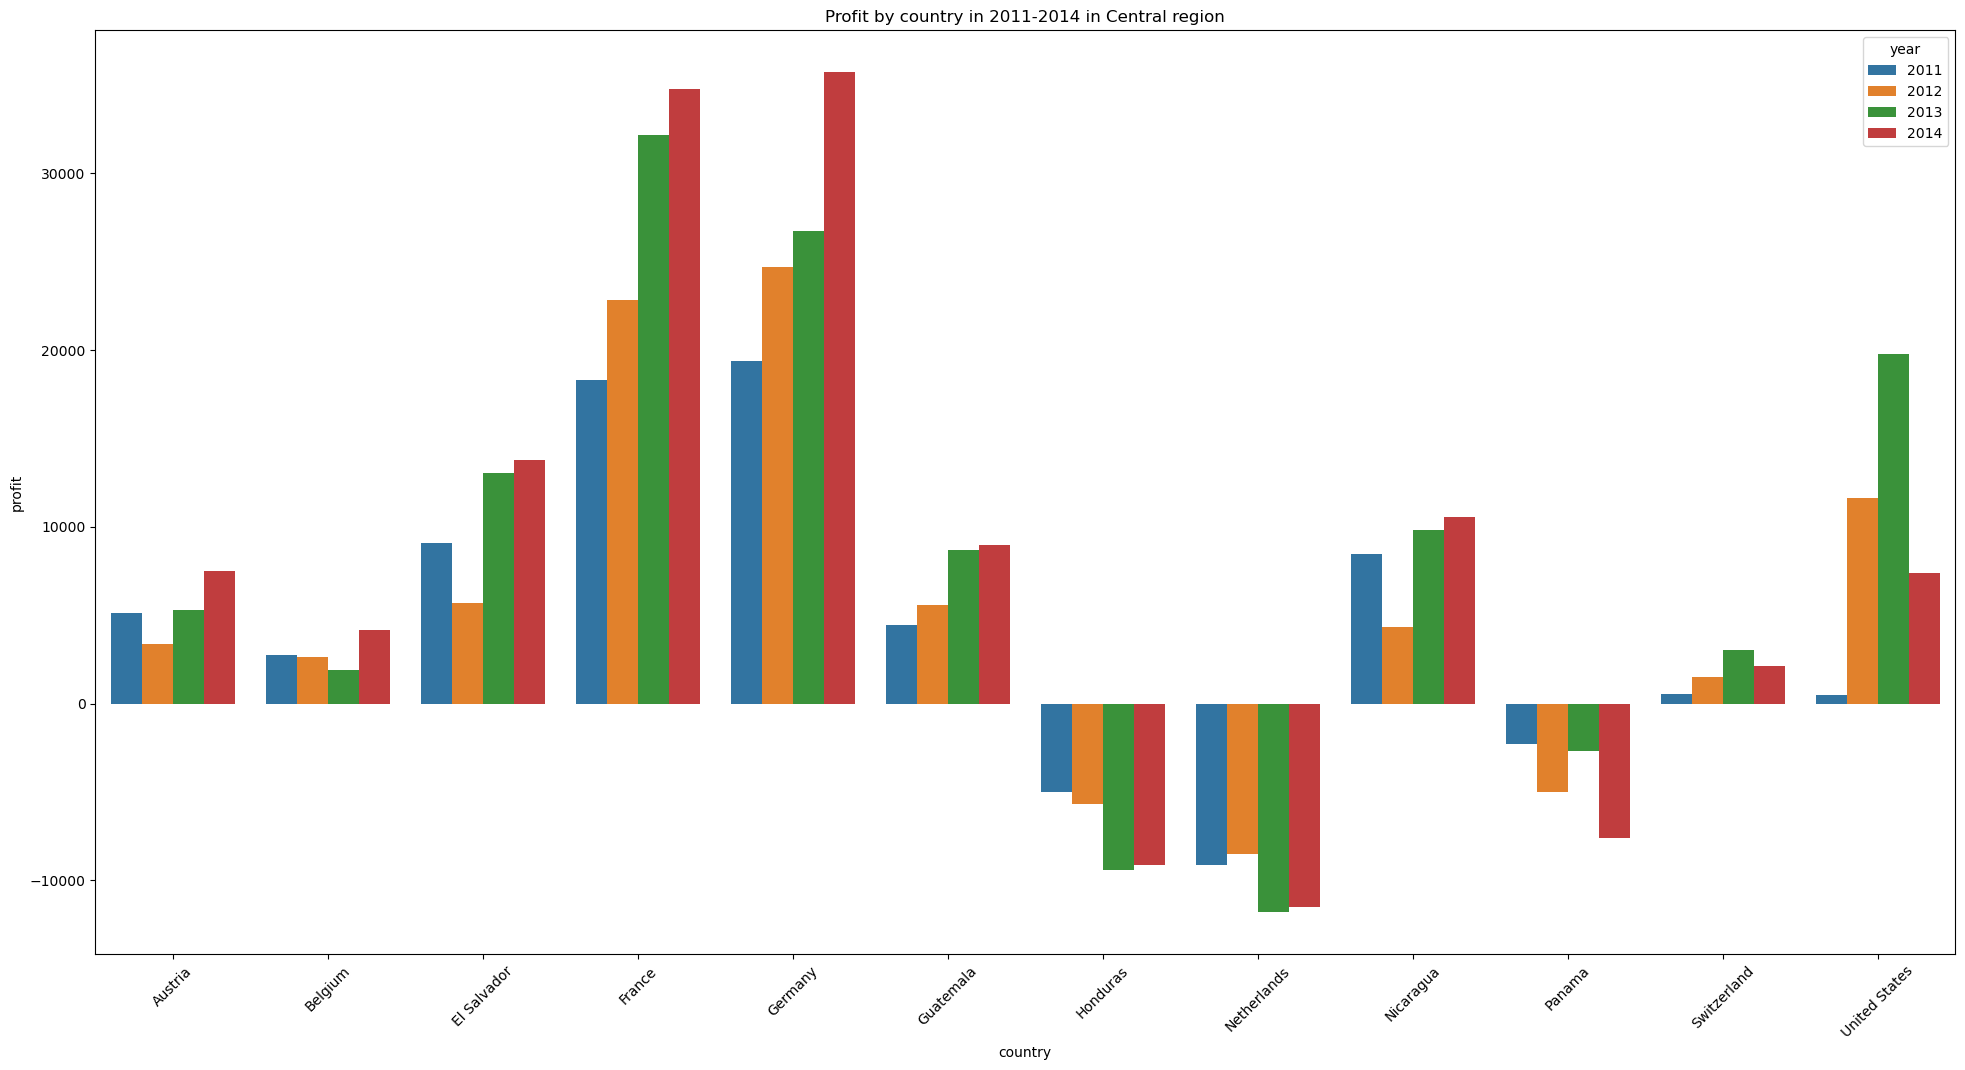

In [13]:
#problem countries in Central, North, North Asia, Oceania regions

reg_countries = super_data.groupby(['region','country','year'])['profit'].sum().reset_index()
countries_central = reg_countries[reg_countries['region'] == 'Central'].reset_index()

plt.figure(figsize=[24,12])
sns.barplot(data=countries_central, x='country', y='profit', hue='year')
plt.xticks(rotation=45)
plt.title("Profit by country in 2011-2014 in Central region")
plt.show()

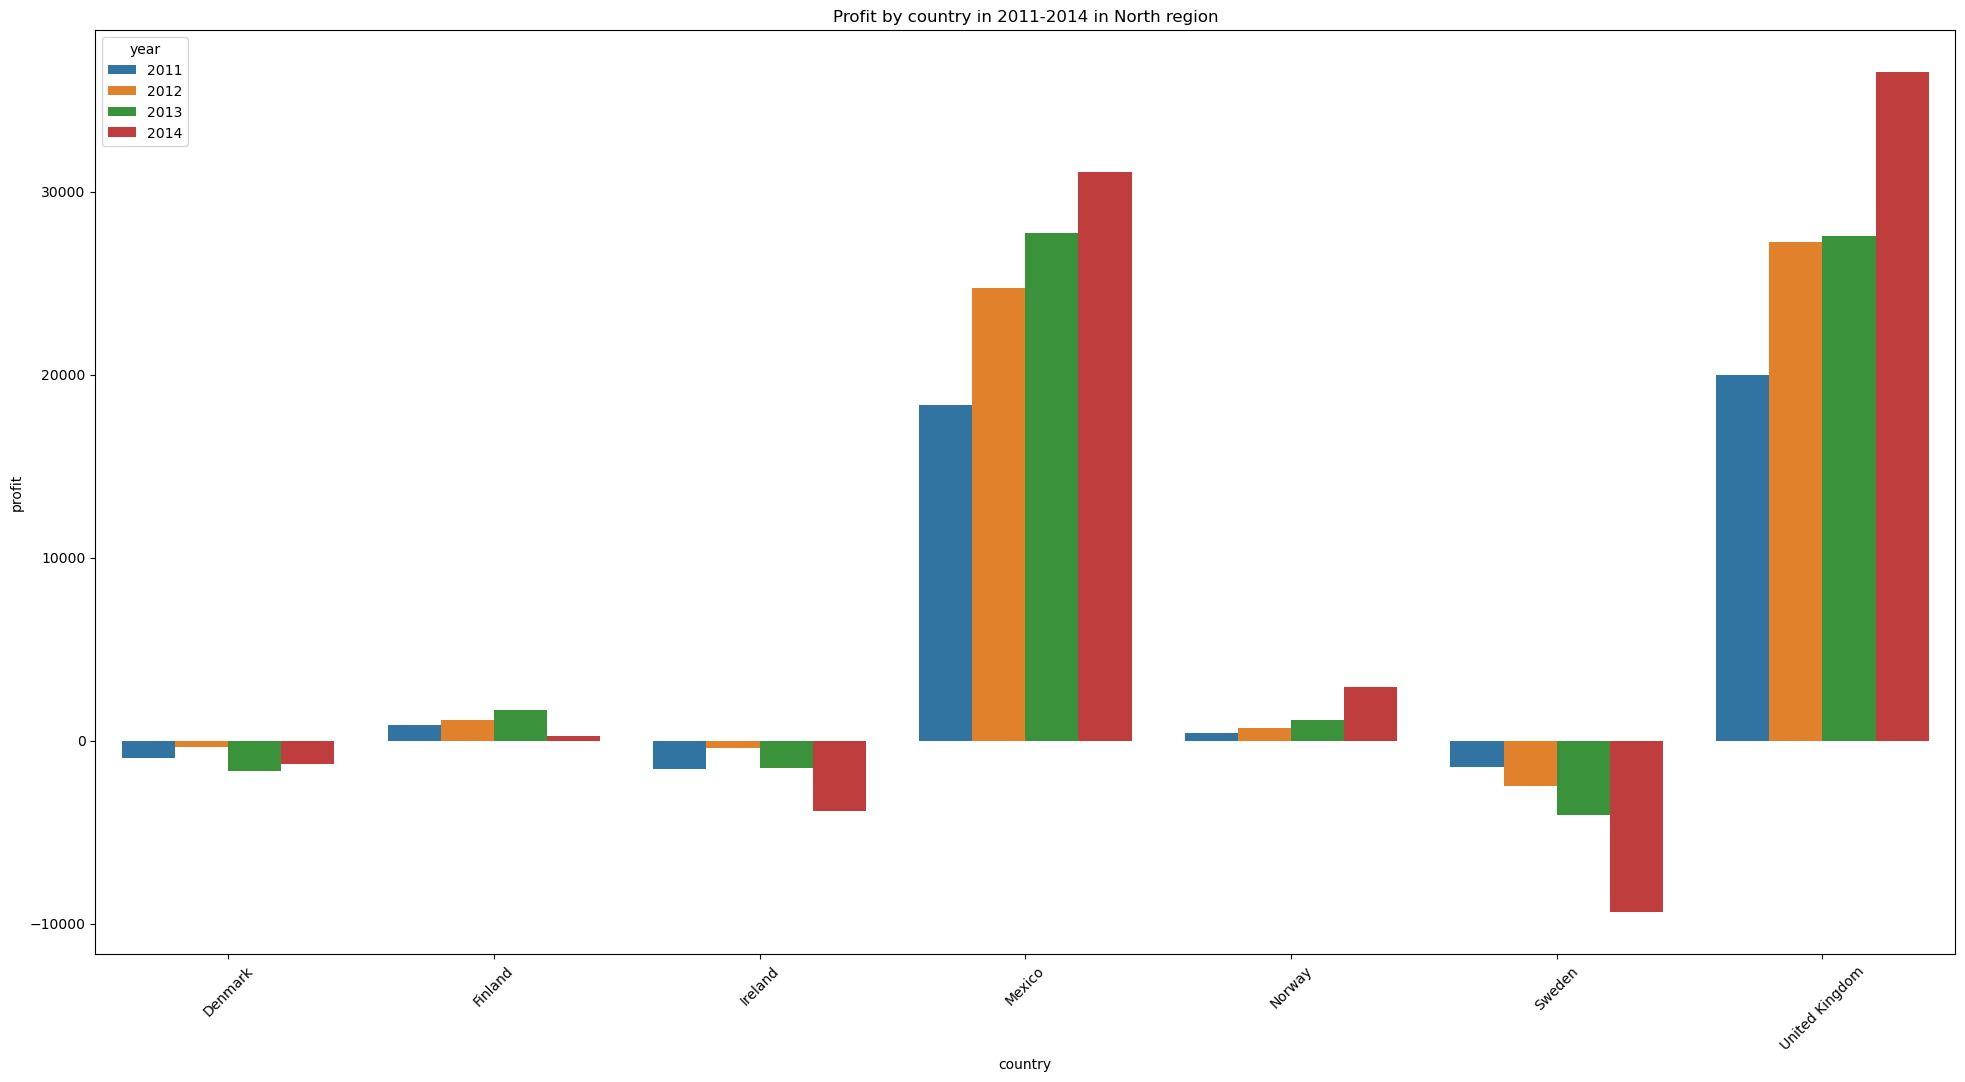

In [14]:
countries_north = reg_countries[reg_countries['region'] == 'North'].reset_index()

plt.figure(figsize=[24,12])
sns.barplot(data=countries_north, x='country', y='profit', hue='year')
plt.xticks(rotation=45)
plt.title("Profit by country in 2011-2014 in North region")
plt.show()

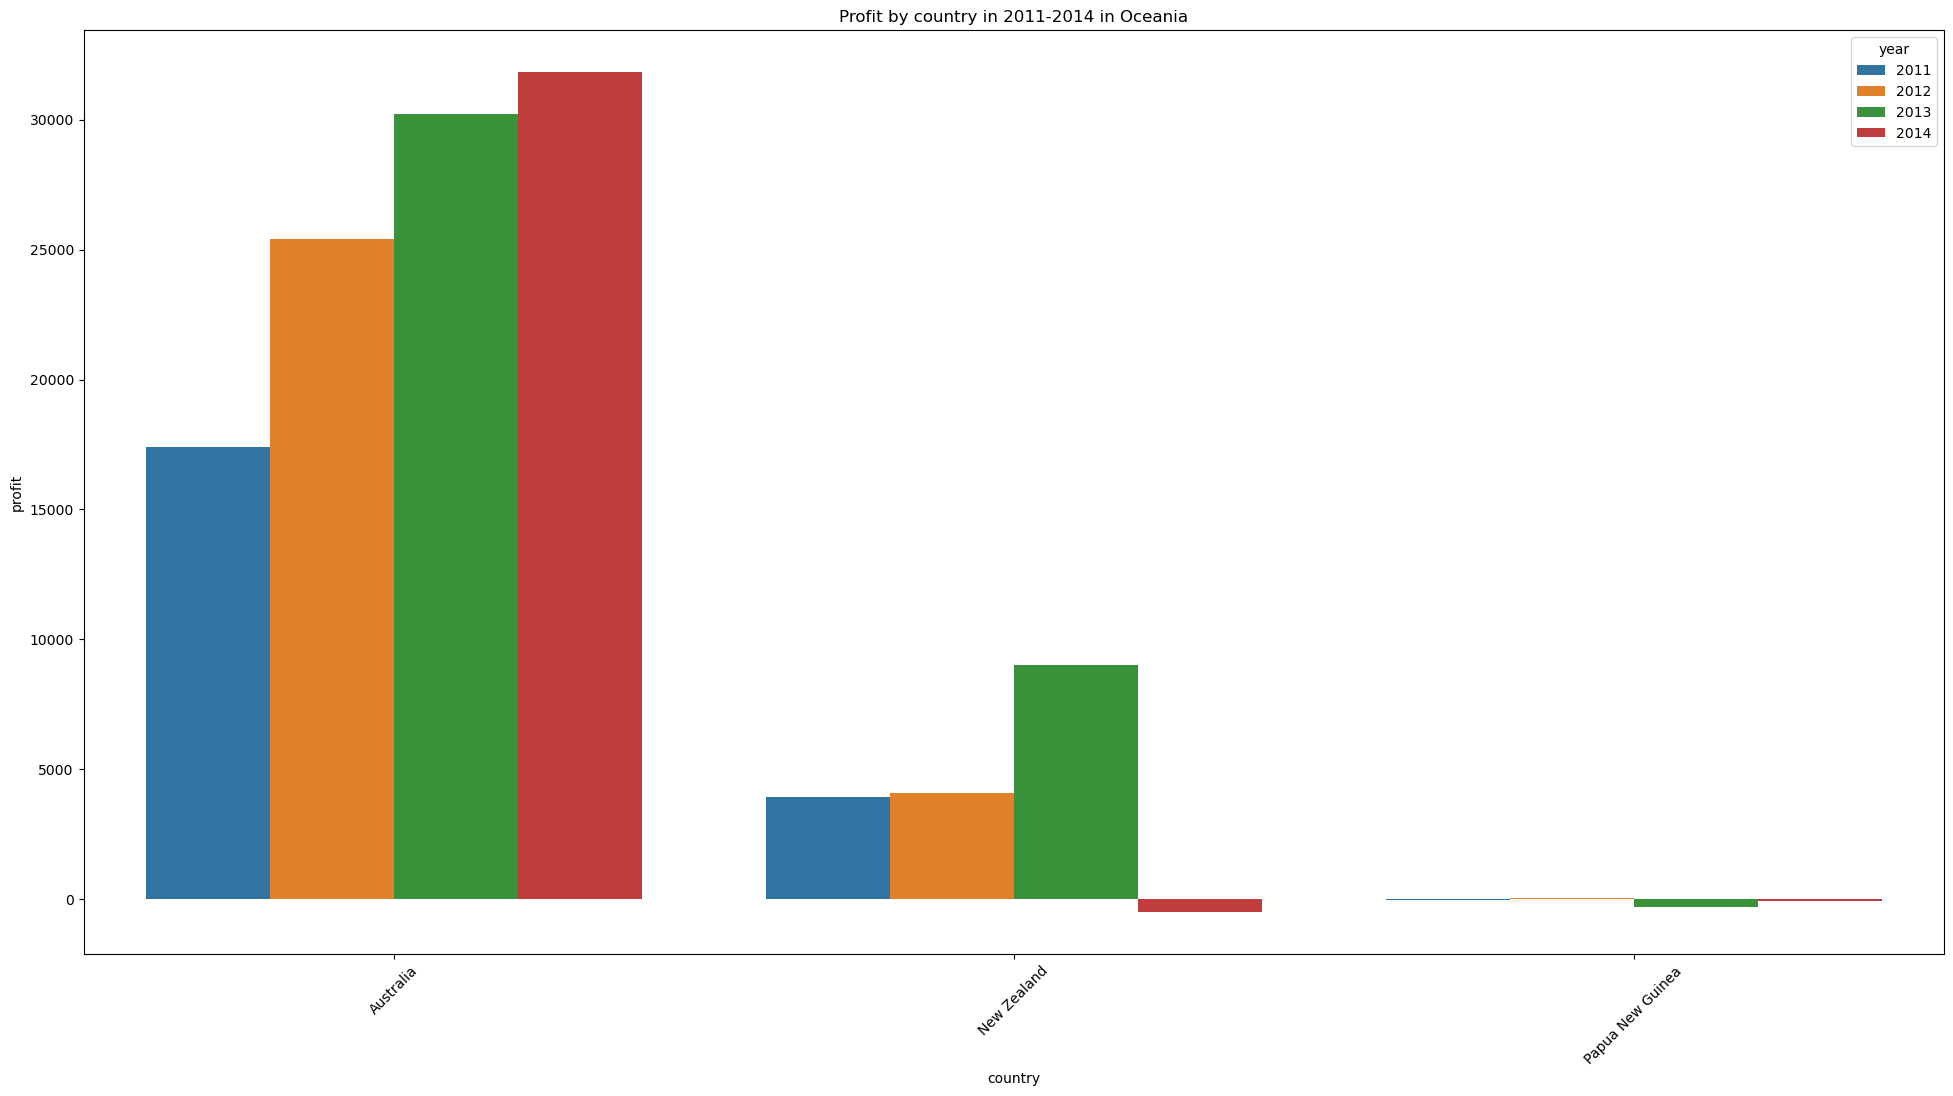

In [15]:
countries_oceania = reg_countries[reg_countries['region'] == 'Oceania'].reset_index()

plt.figure(figsize=[24,12])
sns.barplot(data=countries_oceania, x='country', y='profit', hue='year')
plt.xticks(rotation=45)
plt.title("Profit by country in 2011-2014 in Oceania")
plt.show()

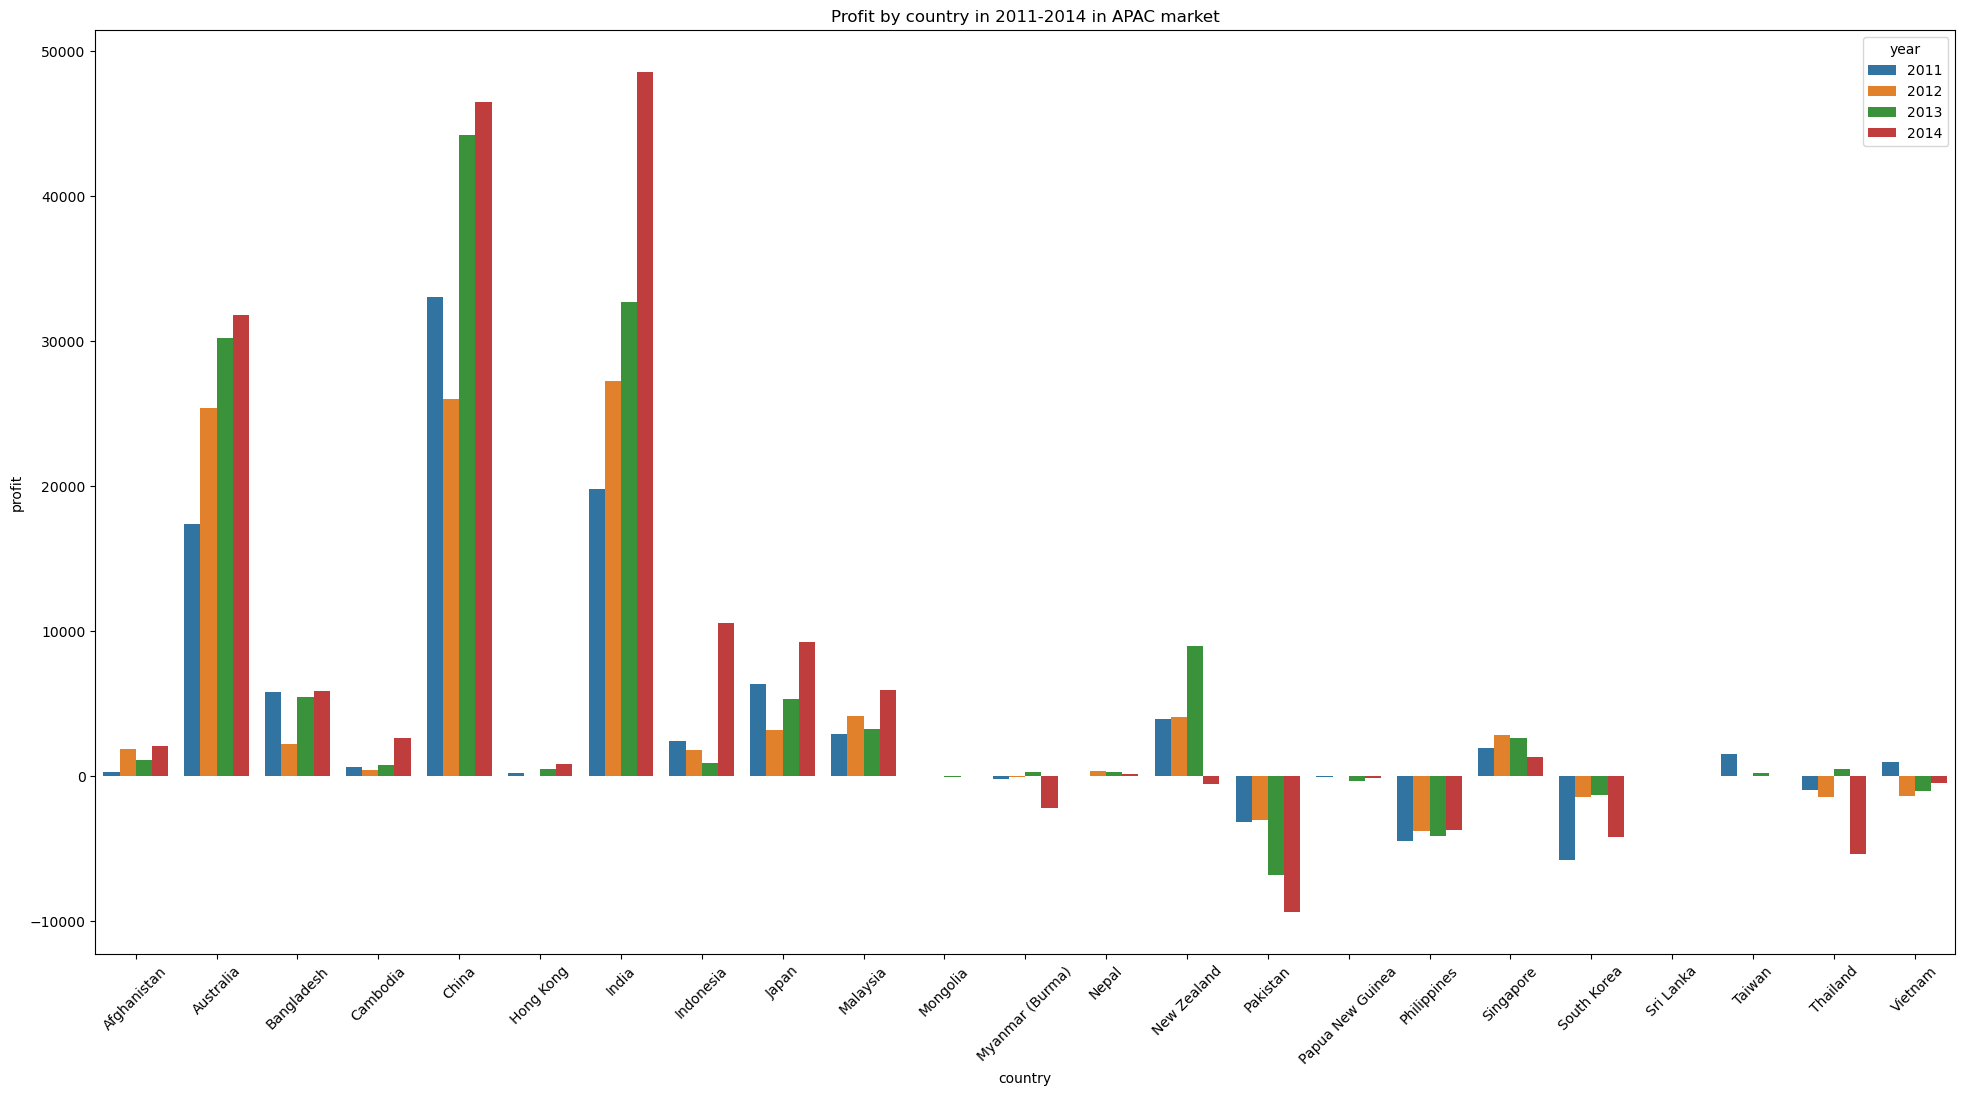

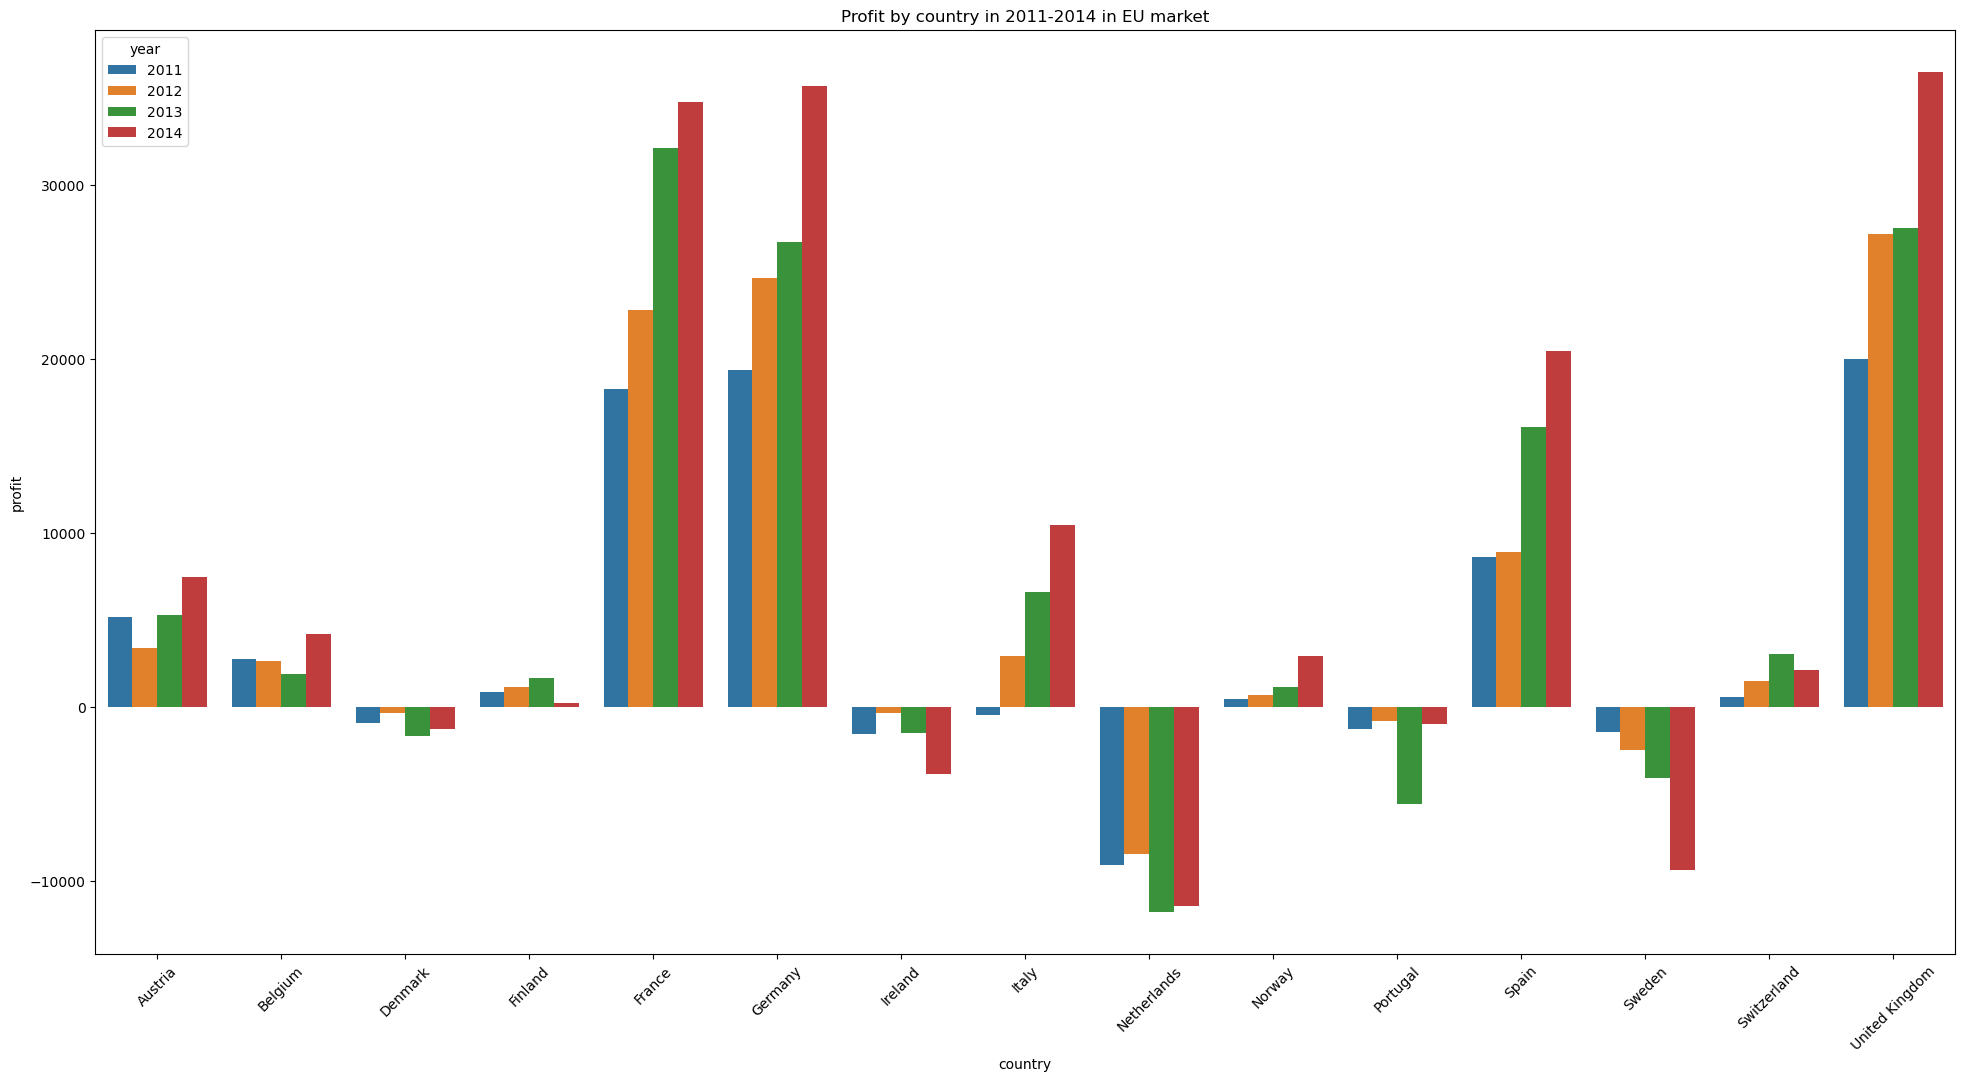

In [16]:
# markets: APAC, EU
market_countries = super_data.groupby(['market','country','year'])['profit'].sum().reset_index()
countries_apac = market_countries[market_countries['market'] == 'APAC'].reset_index()

plt.figure(figsize=[24,12])
sns.barplot(data=countries_apac, x='country', y='profit', hue='year')
plt.xticks(rotation=45)
plt.title("Profit by country in 2011-2014 in APAC market")
plt.show()

countries_eu = market_countries[market_countries['market'] == 'EU'].reset_index()

plt.figure(figsize=[24,12])
sns.barplot(data=countries_eu, x='country', y='profit', hue='year')
plt.xticks(rotation=45)
plt.title("Profit by country in 2011-2014 in EU market")
plt.show()

# Pt II: Customer segementation and bulk of profit. Most profitable customers.

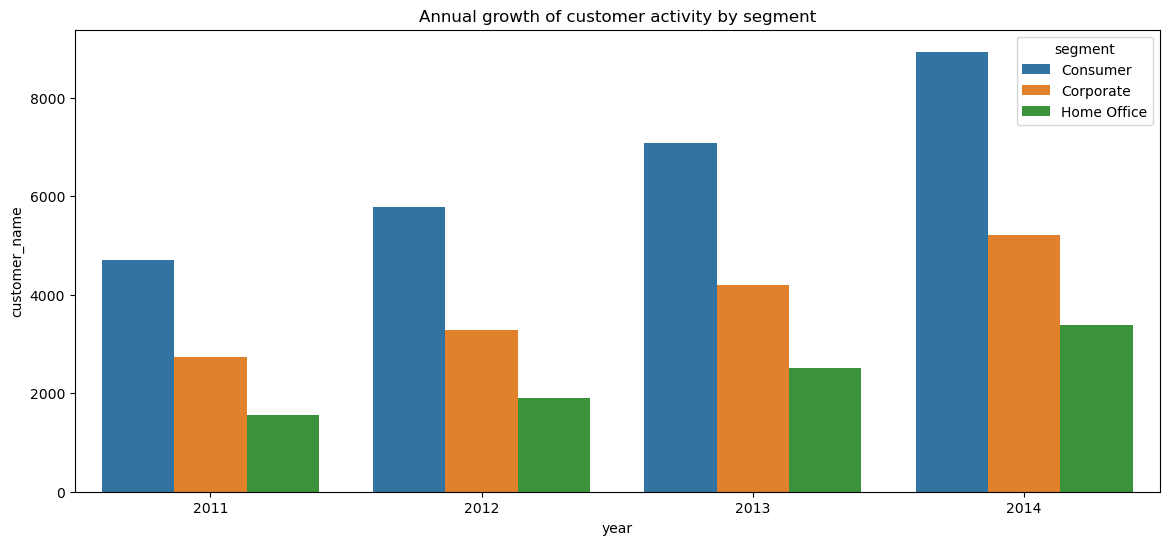

In [17]:
#customer engagement

customer_numbers = super_data.groupby(['year', 'segment'])['customer_name'].count().reset_index()
plt.figure(figsize=[14,6])
sns.barplot(data=customer_numbers, x='year', y='customer_name', hue='segment')
plt.title("Annual growth of customer activity by segment")
plt.show()

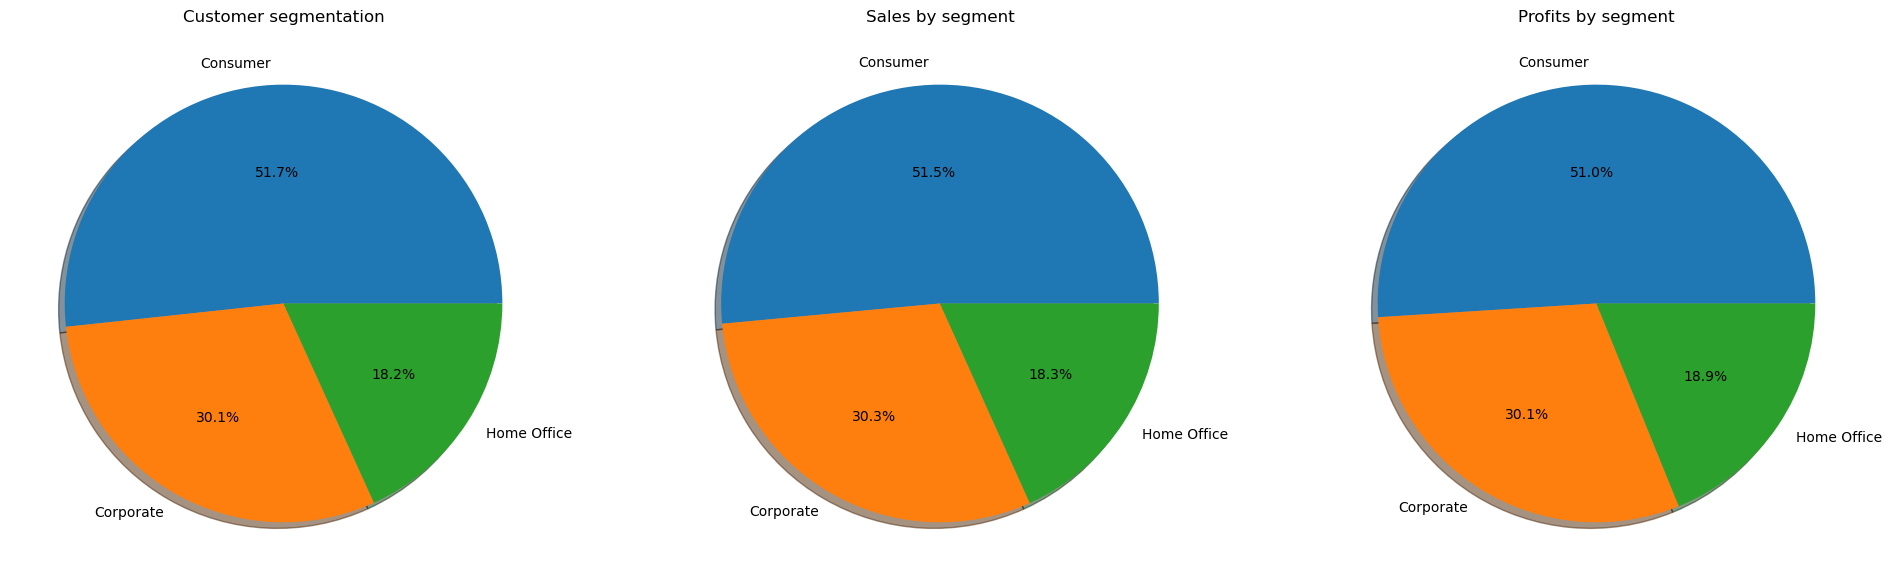

In [18]:
#global segmentation
segment_percentage = super_data['segment'].value_counts().reset_index()

#most sales by segment
most_sales_seg = super_data.groupby('segment')['sales'].sum().reset_index()

#most profit by segment
most_profit_seg = super_data.groupby('segment')['profit'].sum().reset_index()

#clear consumer predominance with the corporate coming second
plt.figure(figsize=[24,10])
plt.subplot(1,3,1)
plt.title('Customer segmentation')
plt.pie(segment_percentage['segment'], labels=segment_percentage['index'], autopct='%1.1f%%', shadow=True)
plt.subplot(1,3,2)
plt.title('Sales by segment')
plt.pie(most_sales_seg['sales'],labels=most_sales_seg['segment'], autopct='%1.1f%%', shadow=True)
plt.subplot(1,3,3)
plt.title('Profits by segment')
plt.pie(most_profit_seg['profit'],labels=most_profit_seg['segment'], autopct='%1.1f%%', shadow=True)
plt.show()

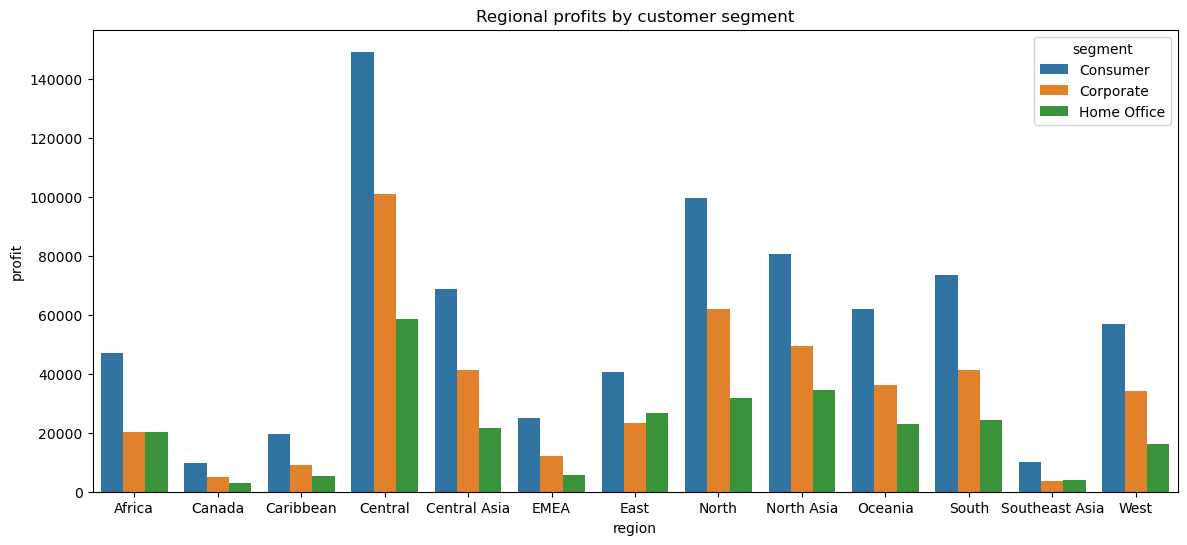

In [19]:
#regional profits by segment
region_seg_prof = super_data.groupby(['segment','region'])['profit'].sum().reset_index()
plt.figure(figsize=[14,6])
sns.barplot(data=region_seg_prof, x=region_seg_prof['region'], y=region_seg_prof['profit'], hue=region_seg_prof['segment'])
plt.title("Regional profits by customer segment")
plt.show()

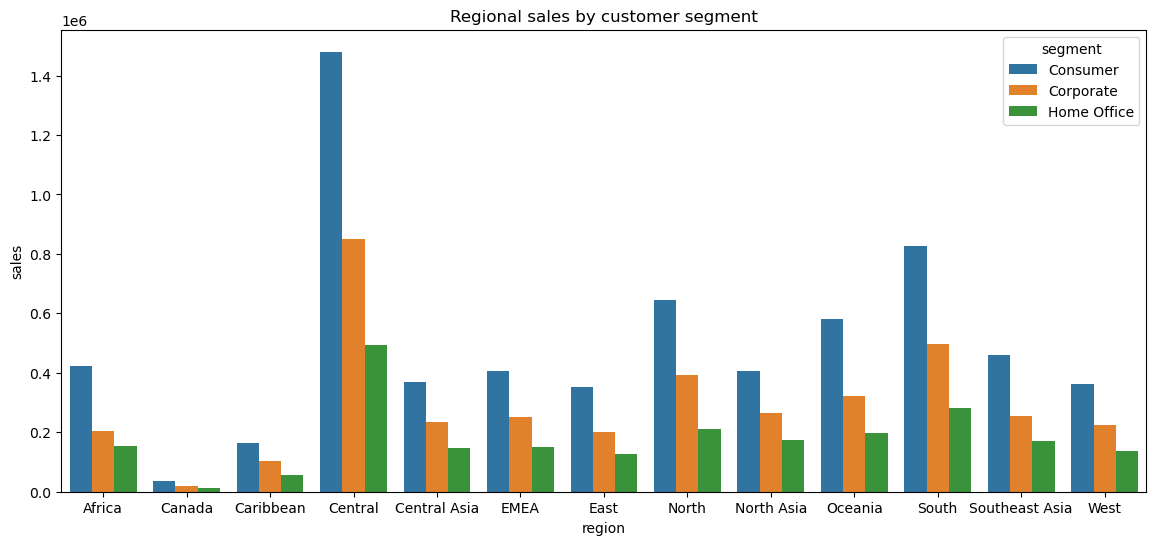

In [20]:
#regional sales by segment
region_seg_sales = super_data.groupby(['segment','region'])['sales'].sum().reset_index()
plt.figure(figsize=[14,6])
sns.barplot(data=region_seg_sales, x=region_seg_sales['region'], y=region_seg_sales['sales'], hue=region_seg_sales['segment'])
plt.title("Regional sales by customer segment")
plt.show()

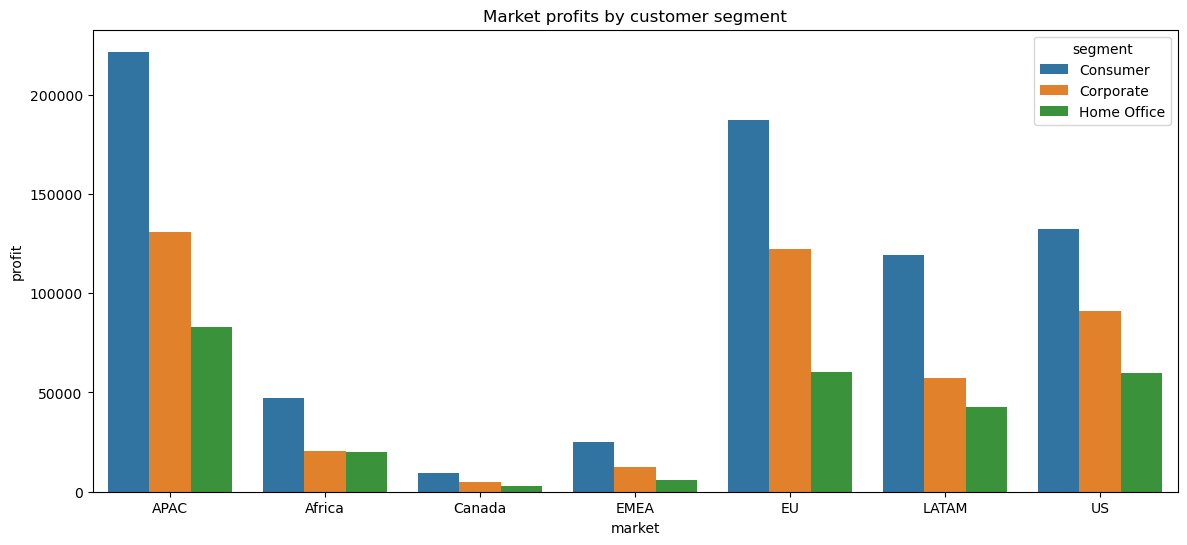

In [21]:
#market profit
market_seg_prof = super_data.groupby(['segment','market'])['profit'].sum().reset_index()
plt.figure(figsize=[14,6])
sns.barplot(data=market_seg_prof, x=market_seg_prof['market'], y=market_seg_prof['profit'], hue=market_seg_prof['segment'])
plt.title("Market profits by customer segment")
plt.show()

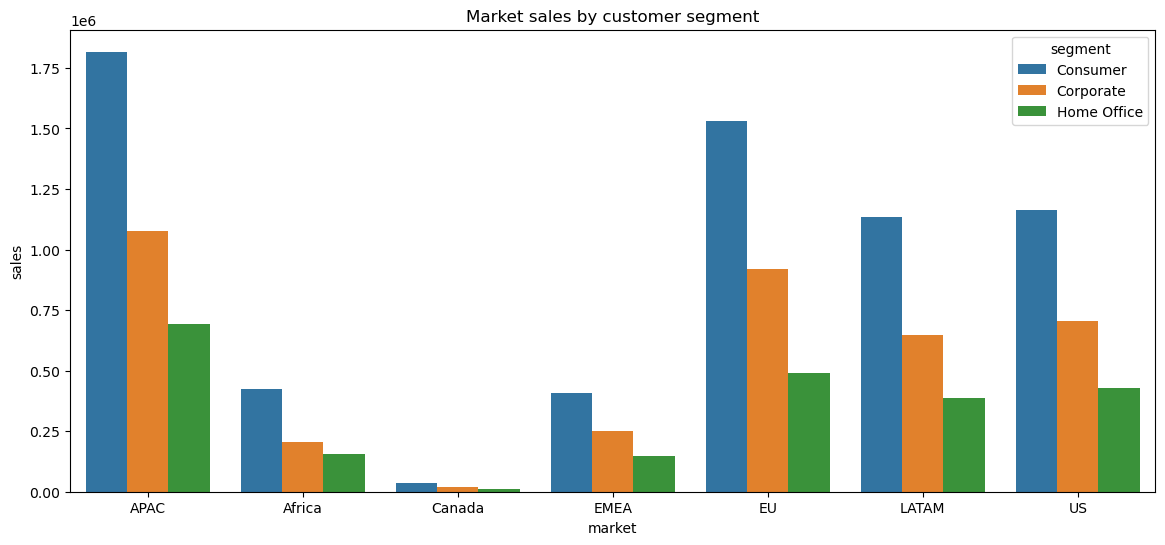

In [22]:
#market sales
market_seg_sales = super_data.groupby(['segment','market'])['sales'].sum().reset_index()
plt.figure(figsize=[14,6])
sns.barplot(data=market_seg_sales, x=market_seg_sales['market'], y=market_seg_sales['sales'], hue=market_seg_sales['segment'])
plt.title("Market sales by customer segment")
plt.show()

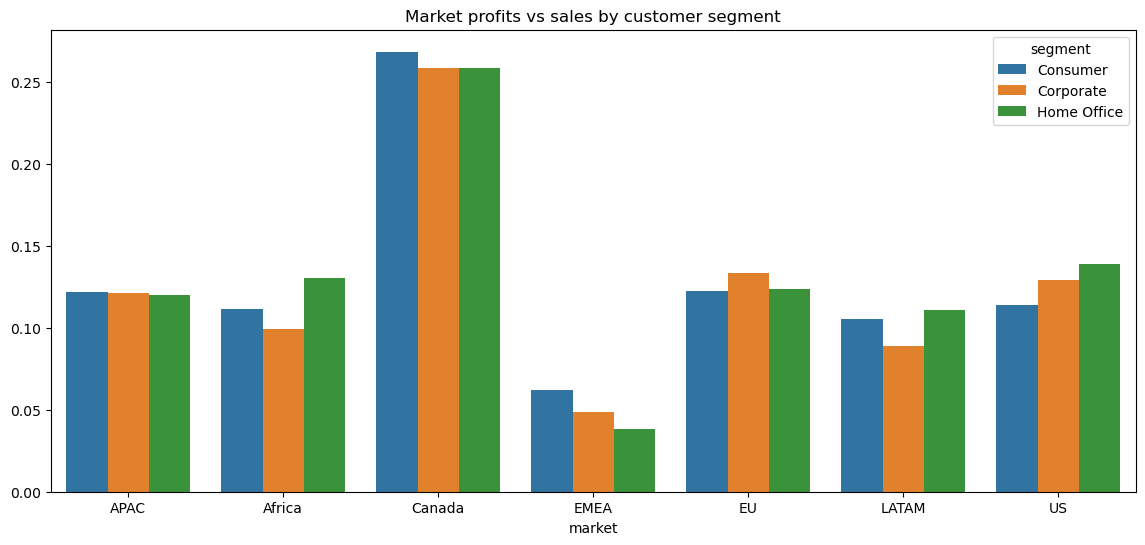

In [23]:
#profit-to-sales by market segment
plt.figure(figsize=[14,6])
sns.barplot(x=market_seg_sales['market'], y=market_seg_prof['profit'] / market_seg_sales['sales'], hue=market_seg_sales['segment'])
plt.title("Market profits vs sales by customer segment")
plt.show()

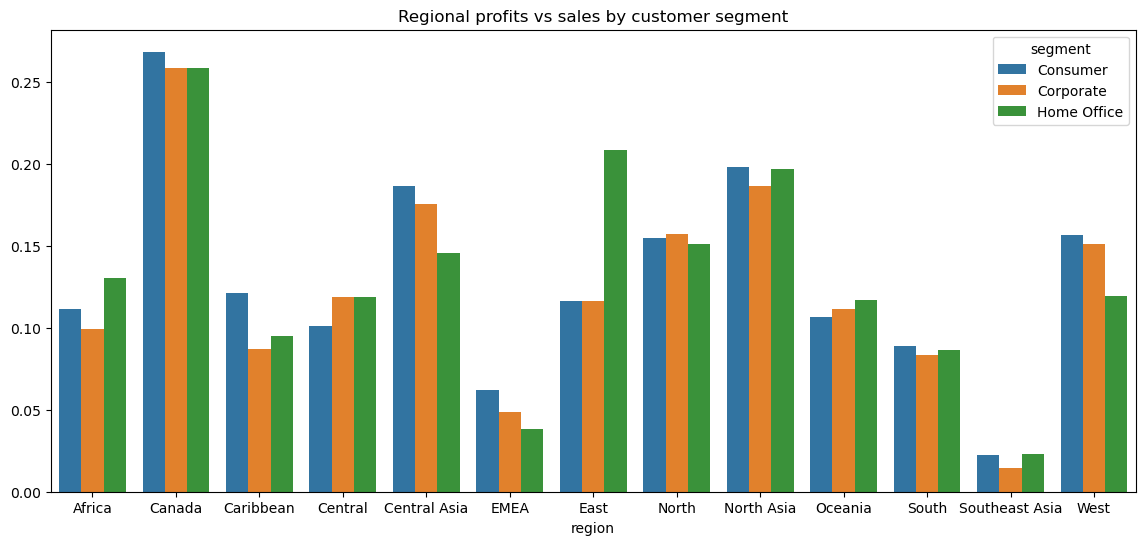

In [24]:
#segment profit vs sales
plt.figure(figsize=[14,6])
sns.barplot(x=region_seg_sales['region'], y=region_seg_prof['profit'] / region_seg_sales['sales'], hue=region_seg_sales['segment']).set_title('Regional profits vs sales by customer segment')
plt.show()

While both profits and sales for the consumer segment outweigh any other category, in terms of profit-to-sales ratio, some regions and markets benefit equally or even more from the corporate and home office segments.

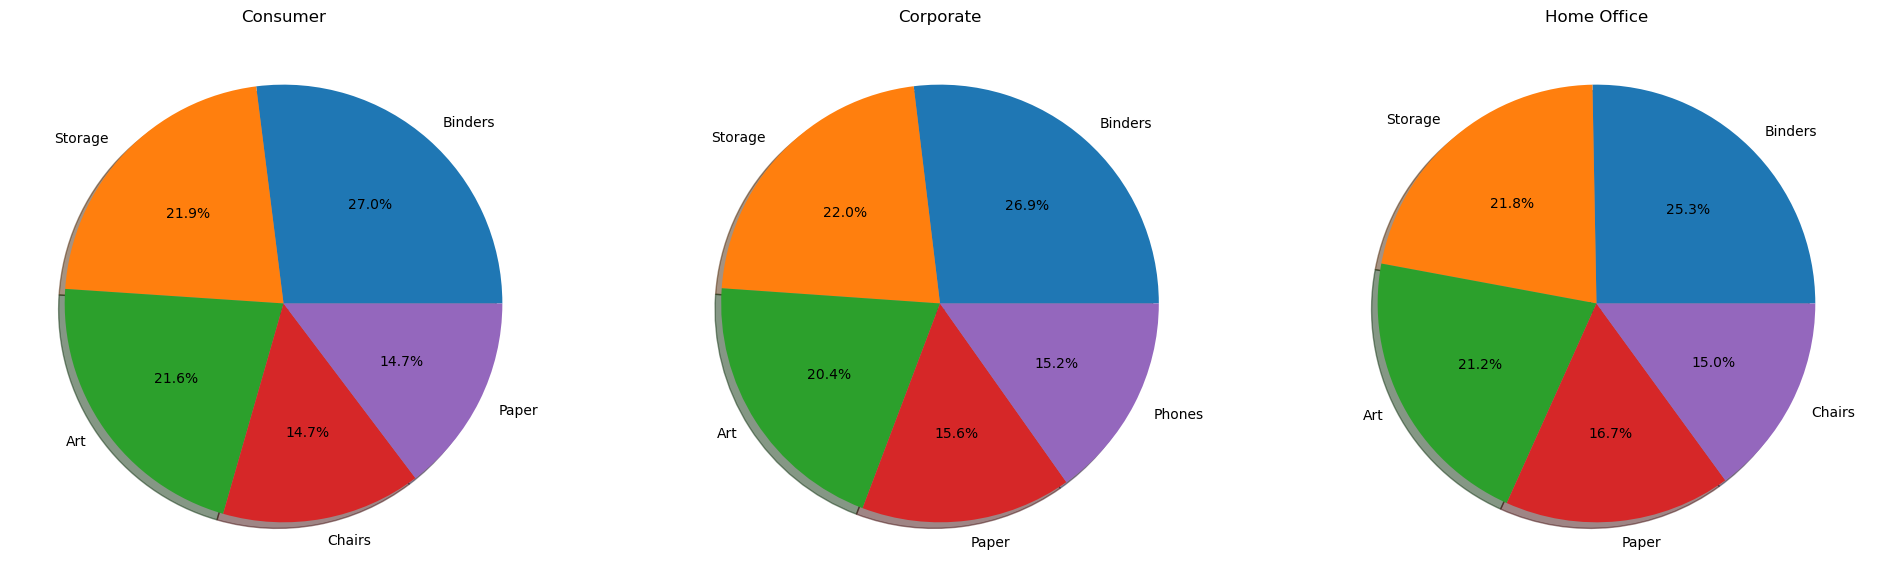

In [25]:
#most popular goods by segment
most_pop_consumer = super_data[super_data['segment'] == 'Consumer']['sub_category'].value_counts()[0:5].reset_index()
most_pop_corporate = super_data[super_data['segment'] == 'Corporate']['sub_category'].value_counts()[0:5].reset_index()
most_pop_home = super_data[super_data['segment'] == 'Home Office']['sub_category'].value_counts()[0:5].reset_index()

plt.figure(figsize=[24,10])
plt.subplot(1,3,1)
plt.title('Consumer')
plt.pie(most_pop_consumer['sub_category'], labels=most_pop_consumer['index'], autopct='%1.1f%%', shadow=True)
plt.subplot(1,3,2)
plt.title('Corporate')
plt.pie(most_pop_corporate['sub_category'], labels=most_pop_corporate['index'], autopct='%1.1f%%', shadow=True)
plt.subplot(1,3,3)
plt.title('Home Office')
plt.pie(most_pop_home['sub_category'], labels=most_pop_home['index'], autopct='%1.1f%%', shadow=True)
plt.show()

Storage, Binders and Art seem to be the most popular sub-categories among customers from all segments. Paper takes 4th place for Corporate and Home Office segments, with Phones and Chairs taking the last place for each of them respectively. Paper and Chairs seem to have equal poplarity (14.7%) for Consumers.

# Pt III: Popularity of goods by region, market, segment and year. Most profitable sub-categories in 2014.

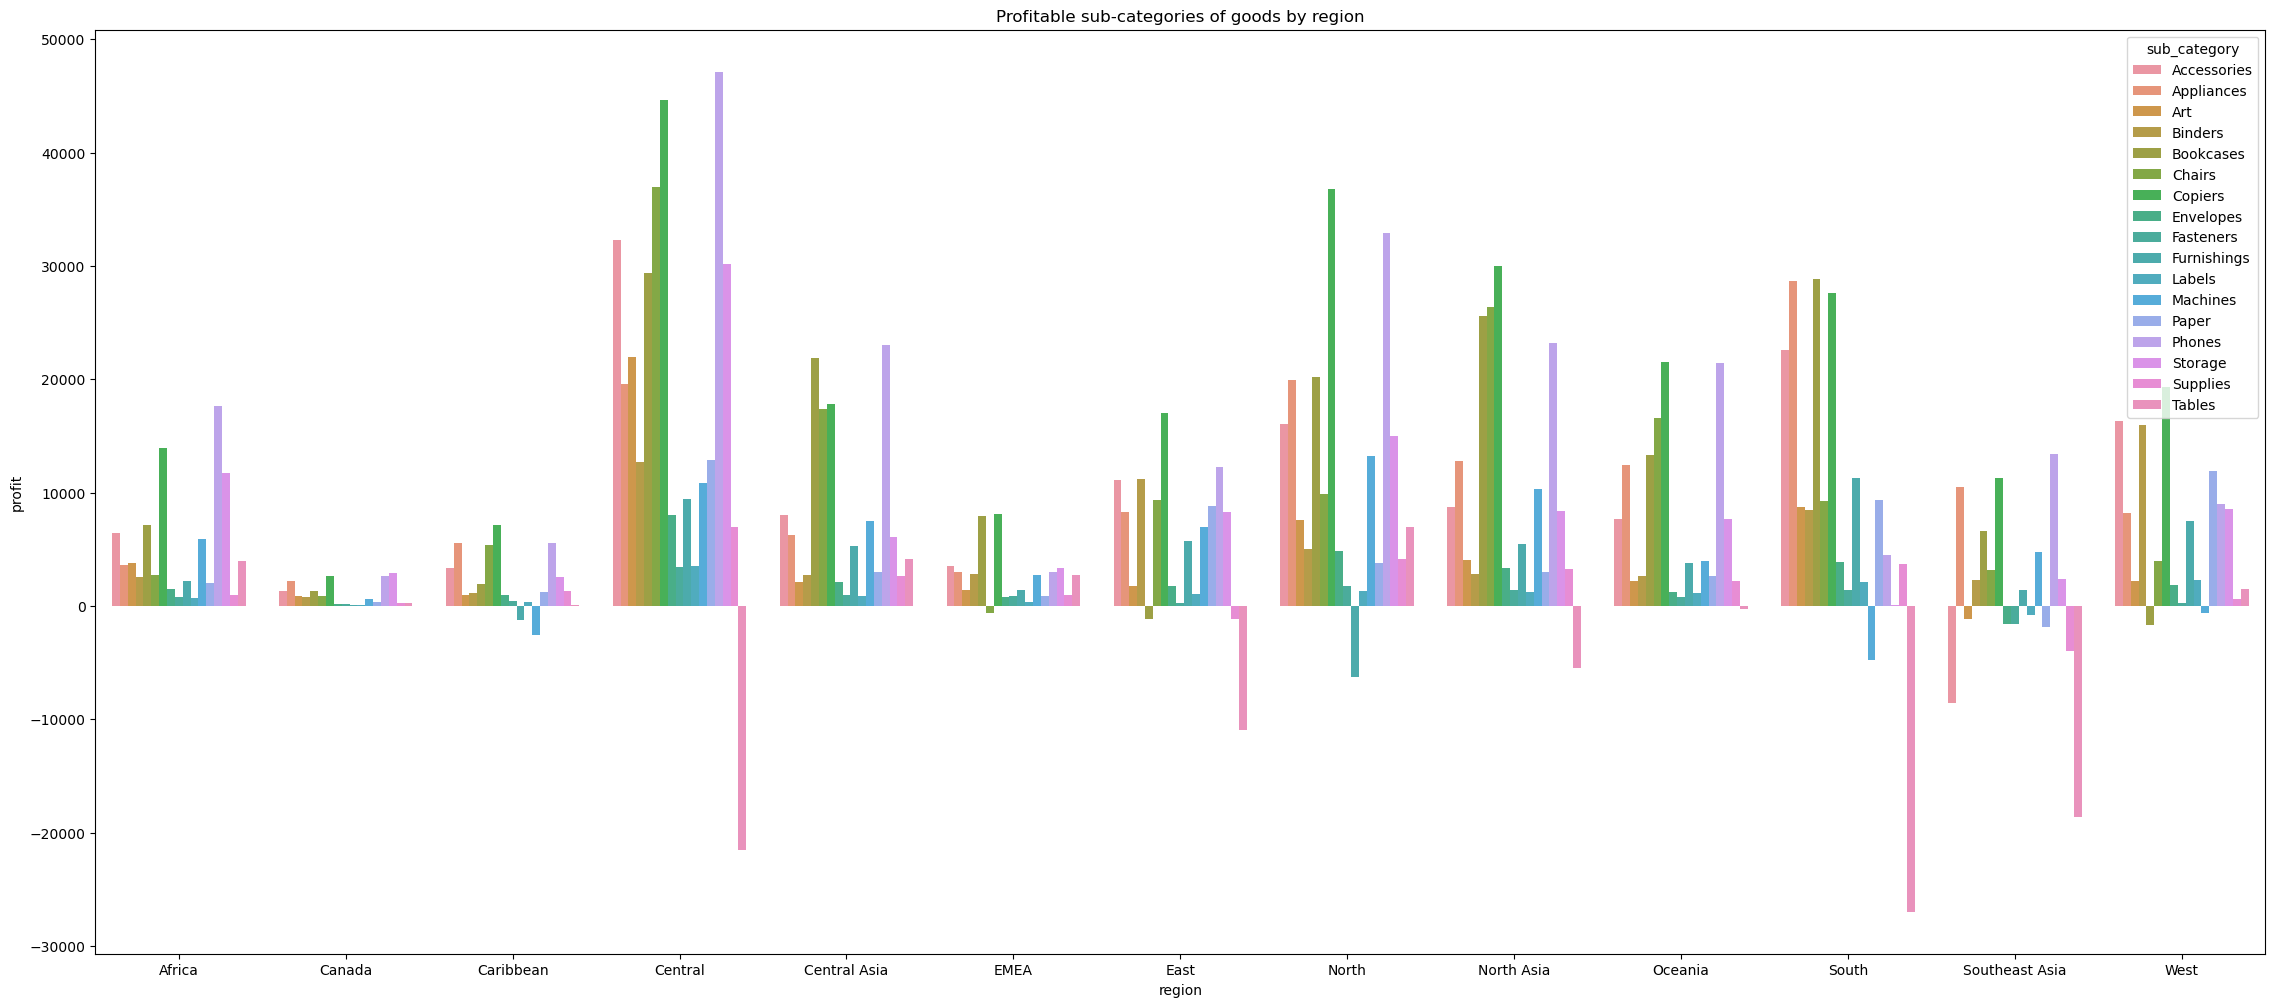

In [26]:
#profitable sub-categories of goods by region
profitable_cat_reg = super_data.groupby(['region', 'sub_category'])['profit'].sum().reset_index()
plt.figure(figsize=[28,12])
sns.barplot(data=profitable_cat_reg, x='region', y='profit', hue='sub_category').set_title('Profitable sub-categories of goods by region')
plt.show()

In [27]:
#variance in profit
profitable_cat_reg.groupby('sub_category')['profit'].var()

sub_category
Accessories    1.054428e+08
Appliances     6.108698e+07
Art            3.520432e+07
Binders        2.445990e+07
Bookcases      1.317174e+08
Chairs         1.199880e+08
Copiers        1.485751e+08
Envelopes      5.737915e+06
Fasteners      1.289211e+06
Furnishings    2.190127e+07
Labels         1.208127e+06
Machines       2.896647e+07
Paper          2.196486e+07
Phones         1.703297e+08
Storage        6.085696e+07
Supplies       7.214795e+06
Tables         1.220837e+08
Name: profit, dtype: float64

The worst-preforming sub-category in several regions is *tables*, showing negative profits in Central, East, North Asia, South, and Southeast Asian regions. The performance of other goods is consistently higher, without a clear pattern in negative profits.
Among well-performing categories we can name Phones and Copiers, while Supplies, Storage and Appliances show the highest variance in profit.

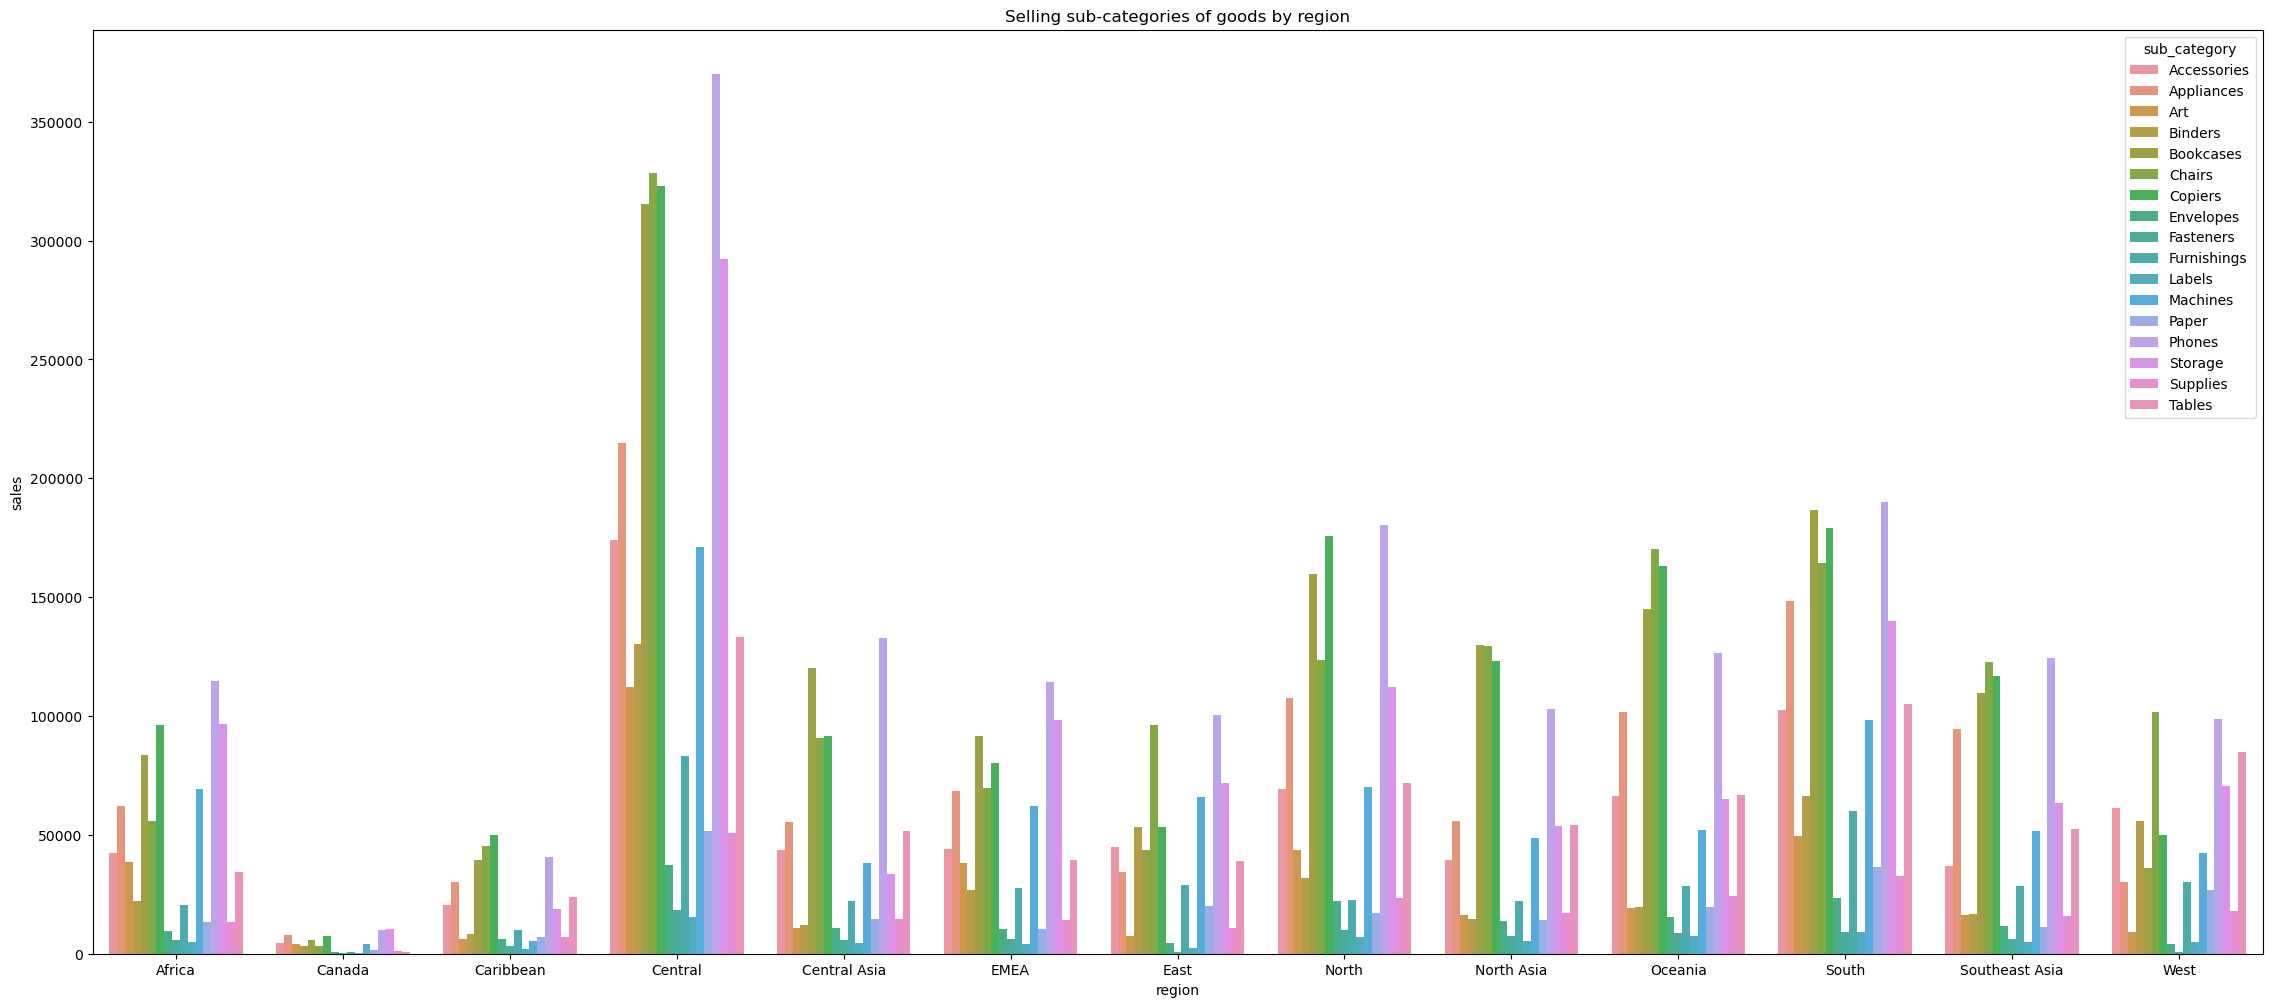

In [28]:
#best-selling sub-categories by region
selling_cat_reg = super_data.groupby(['region', 'sub_category'])['sales'].sum().reset_index()
plt.figure(figsize=[28,12])
sns.barplot(data=selling_cat_reg, x='region', y='sales', hue='sub_category').set_title('Selling sub-categories of goods by region')
plt.show()

Most sub-categories show reasonably high sales, except Art, Binders, Labels, Fasteners and Envelopes. With the exception of Art, which is a special category, the other carried items normally have lower prices. This, in combination with low sales, may lead to negative profits or other losses.

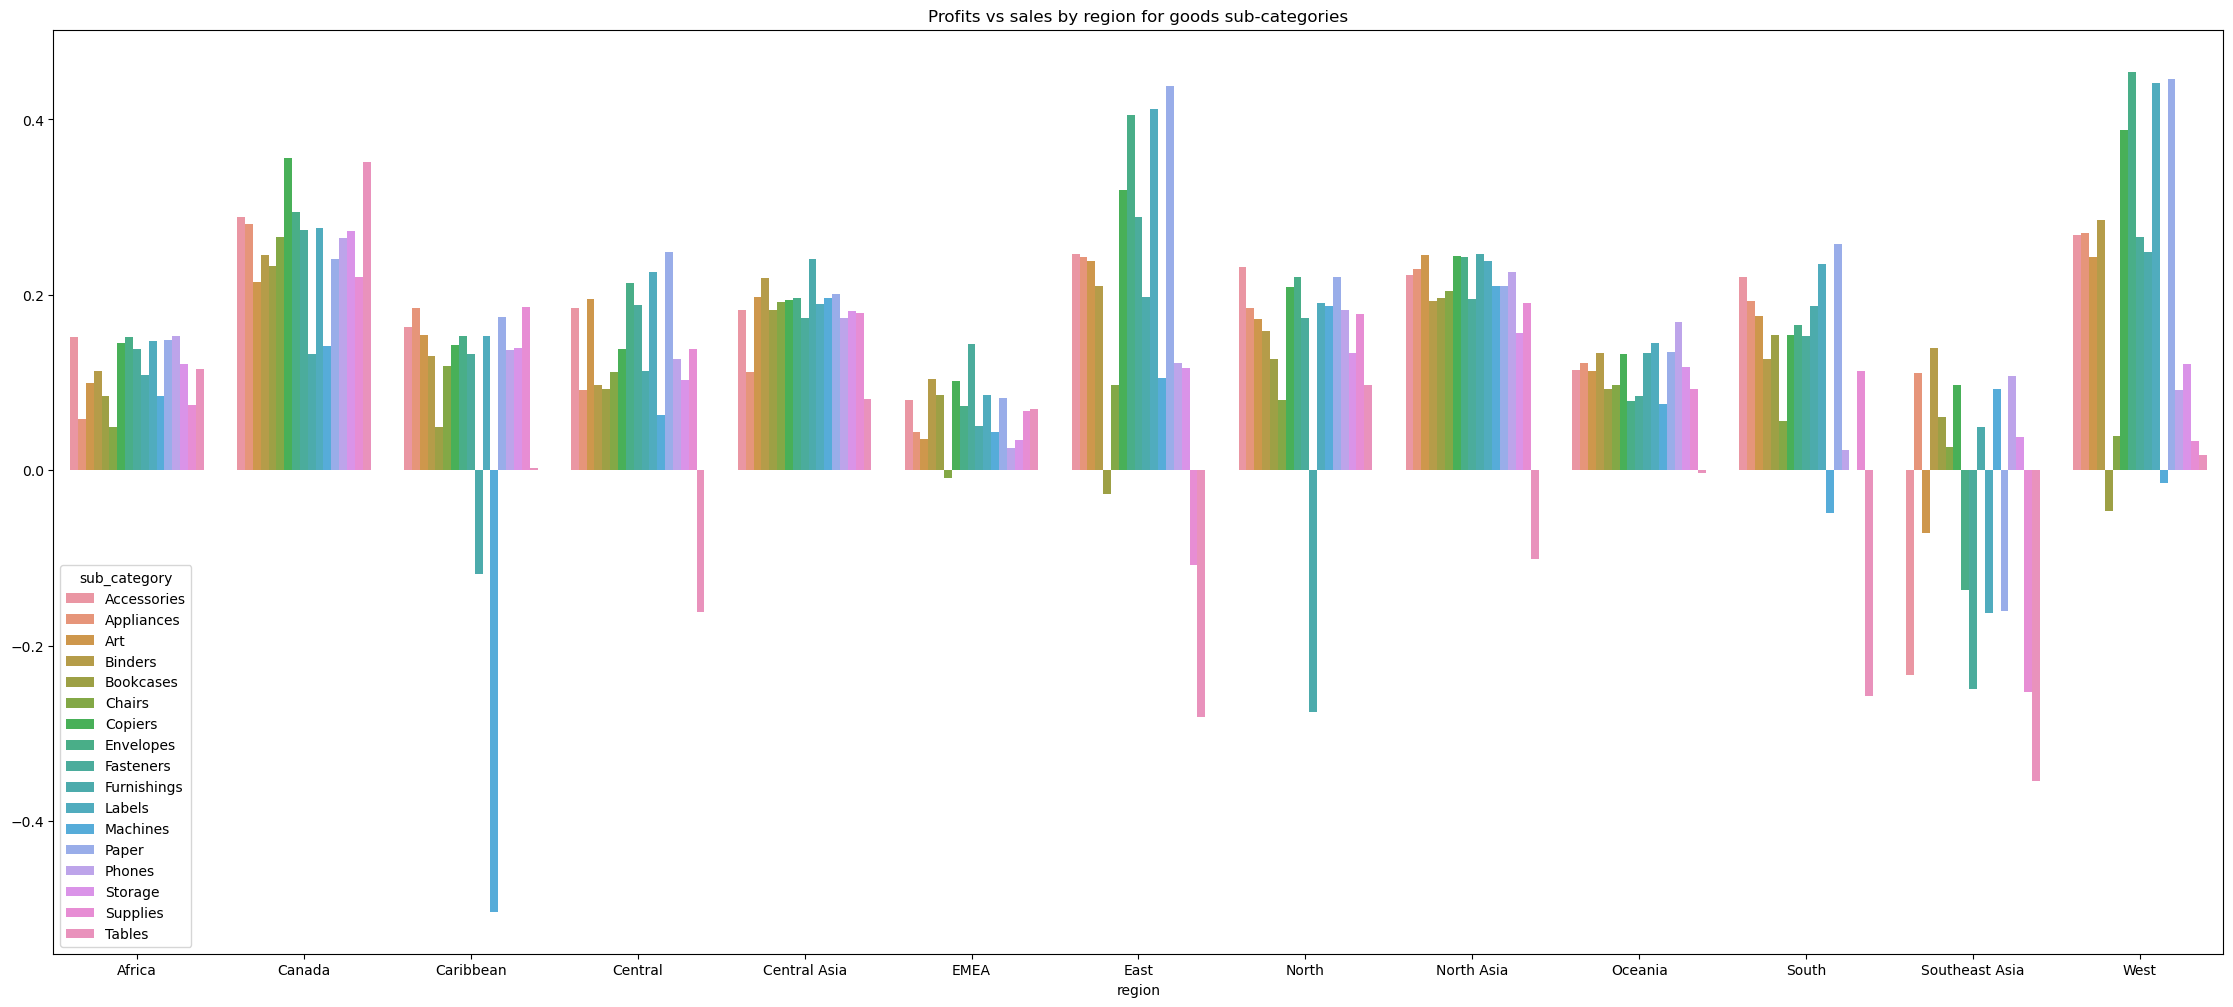

In [29]:
#profits to sales ratio for regions and goods
profit_sales_reg = profitable_cat_reg['profit'] / selling_cat_reg['sales']
plt.figure(figsize=[28,12])
sns.barplot(x=selling_cat_reg['region'], y=profit_sales_reg, hue=profitable_cat_reg['sub_category']).set_title('Profits vs sales by region for goods sub-categories')
plt.show()

As expected, tables show a negative proprtion of profits to sales. More surprising, however, are the results for Southeast Asia, which displays a negative trend for 8 out of 17 sub-categories of goods,and the Carribean, with a highly negative trend for the Machines sub-category. These findings may require additional research.

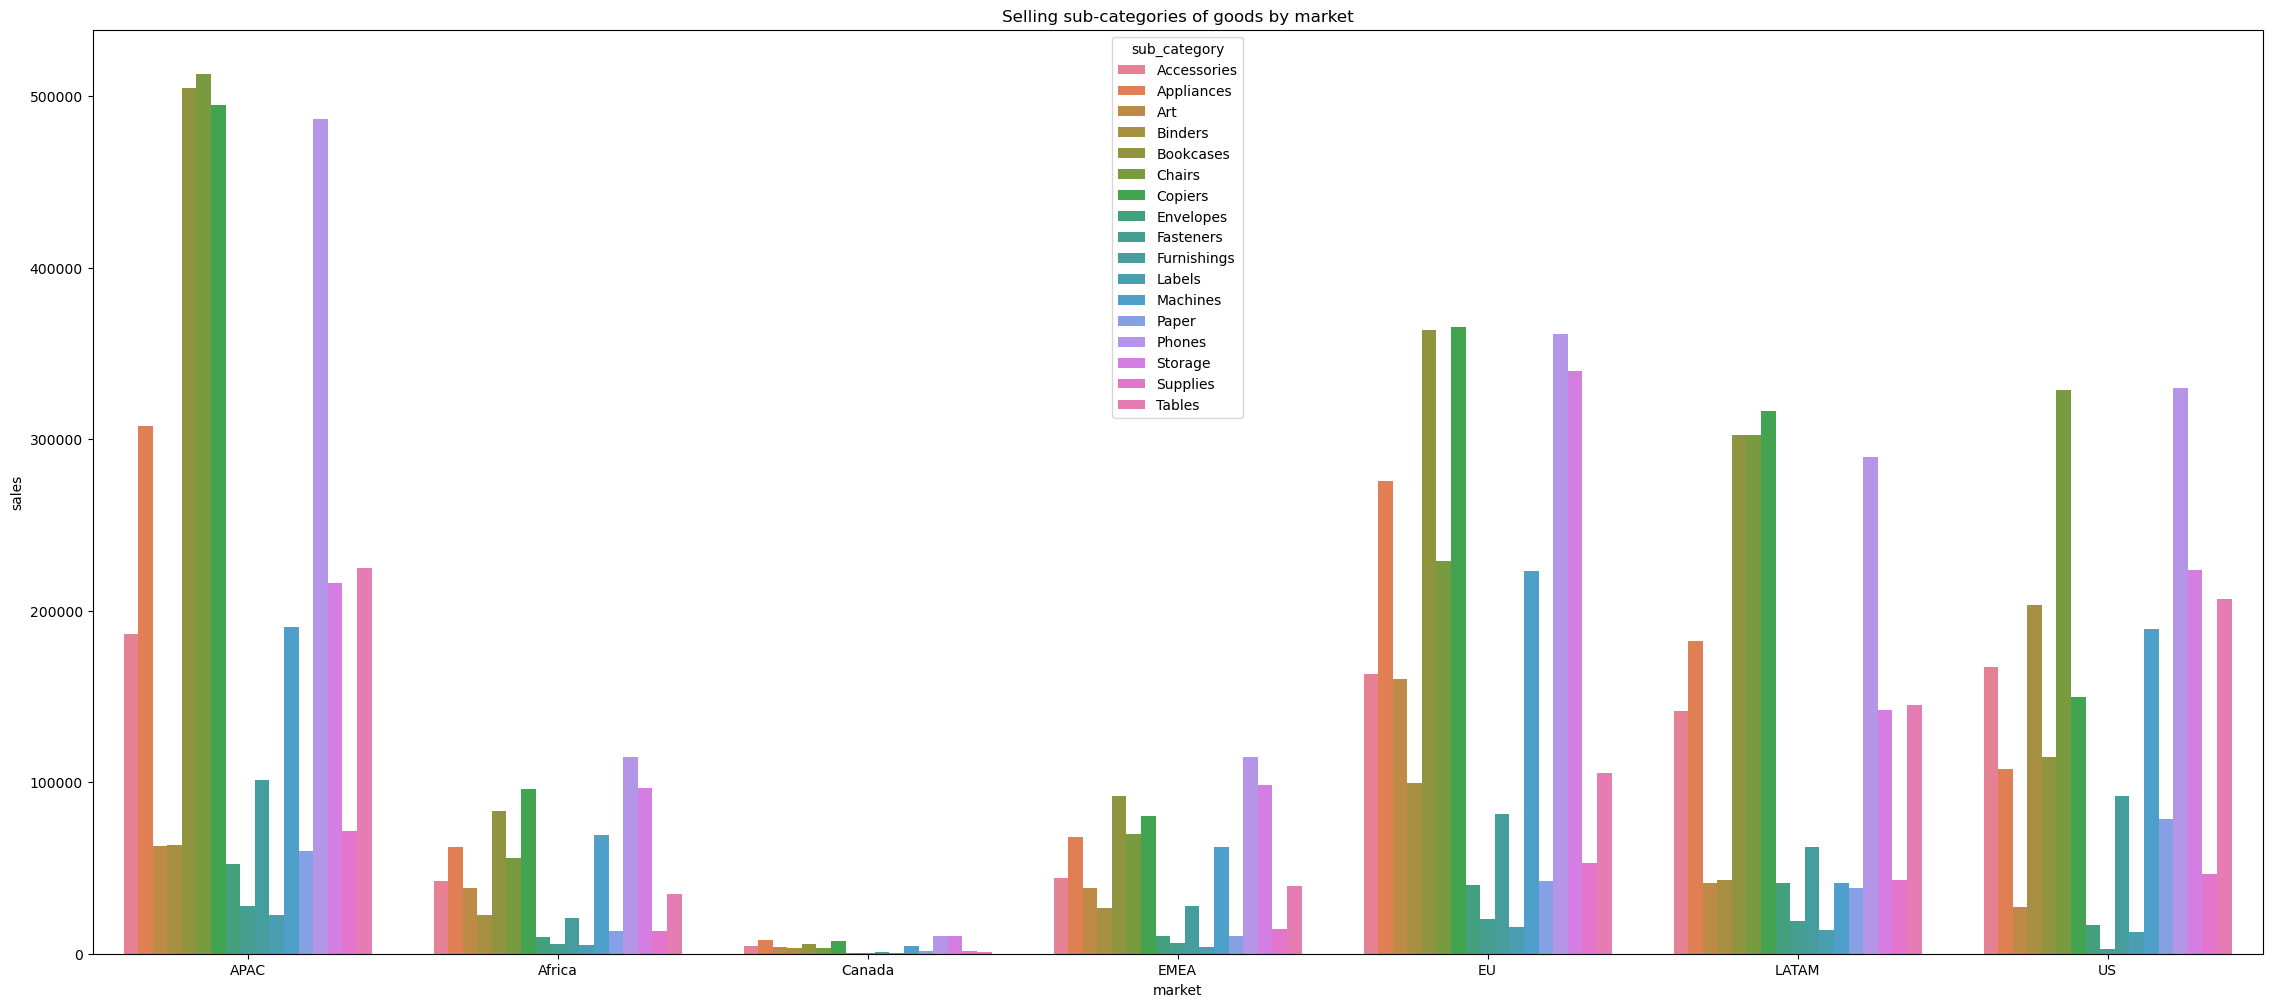

In [30]:
#market analysis of goods
#best-selling categories by market
selling_cat_market = super_data.groupby(['market', 'sub_category'])['sales'].sum().reset_index()
plt.figure(figsize=[28,12])
sns.barplot(data=selling_cat_market, x='market', y='sales', hue='sub_category', palette='husl').set_title("Selling sub-categories of goods by market")
plt.show()

Sales remain similar across markets as well - Phones and Copiers are in the lead, with the addition of Bookcases and Machines for some areas. Envelopes, Fasteners, Labels, Supplies and Paper are at a disadvantage.

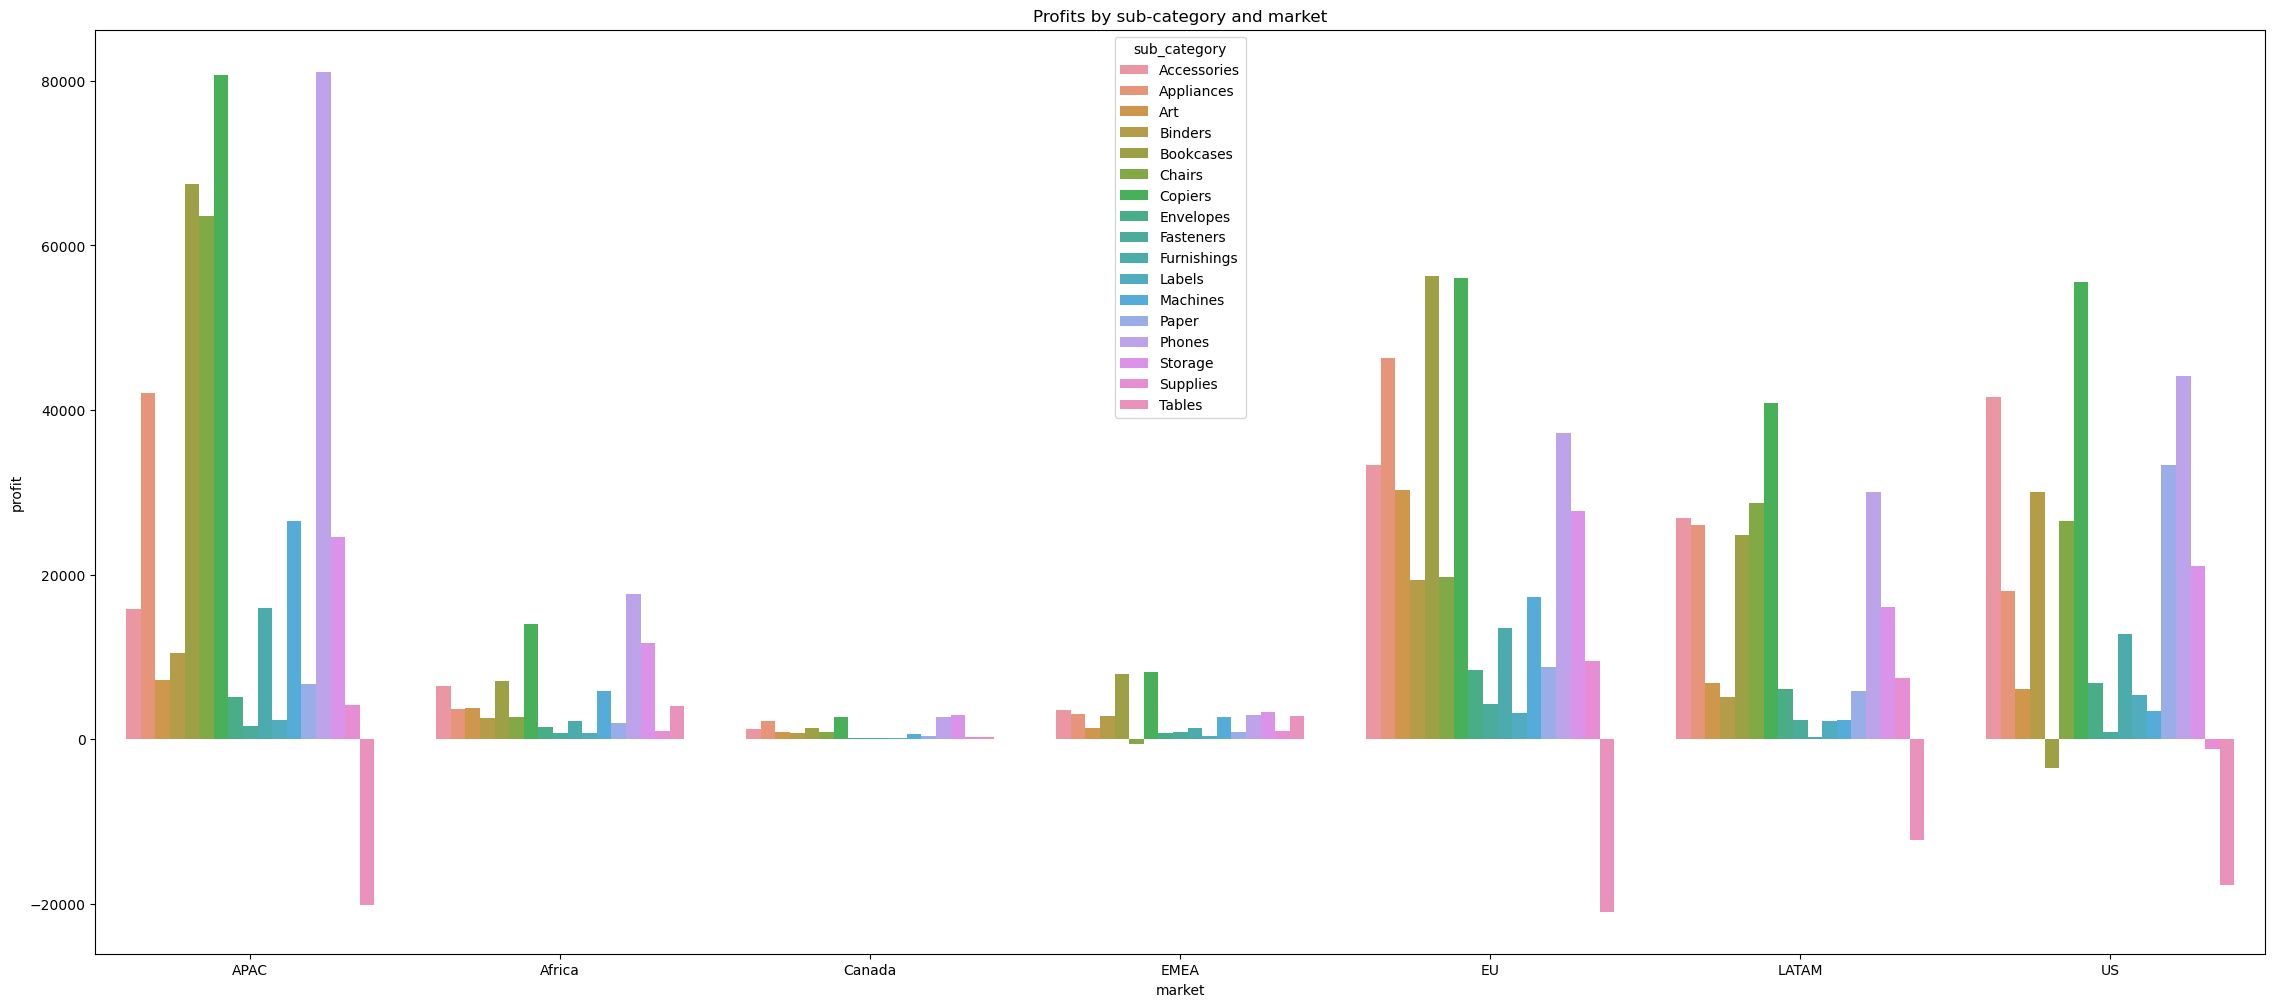

In [31]:
#profit by sub-category and market
profitable_cat_market = super_data.groupby(['market', 'sub_category'])['profit'].sum().reset_index()
plt.figure(figsize=[28,12])
sns.barplot(data=profitable_cat_market, x='market', y='profit', hue='sub_category').set_title("Profits by sub-category and market")
plt.show()

There is a better picture for markets, compared to regions. Tables also generate negative profits in APAC, EU, LATAM and US markets, but other categories, such as Chairs, Bookcases and Supplies in EMEA and US respectively, show only a minor dip.

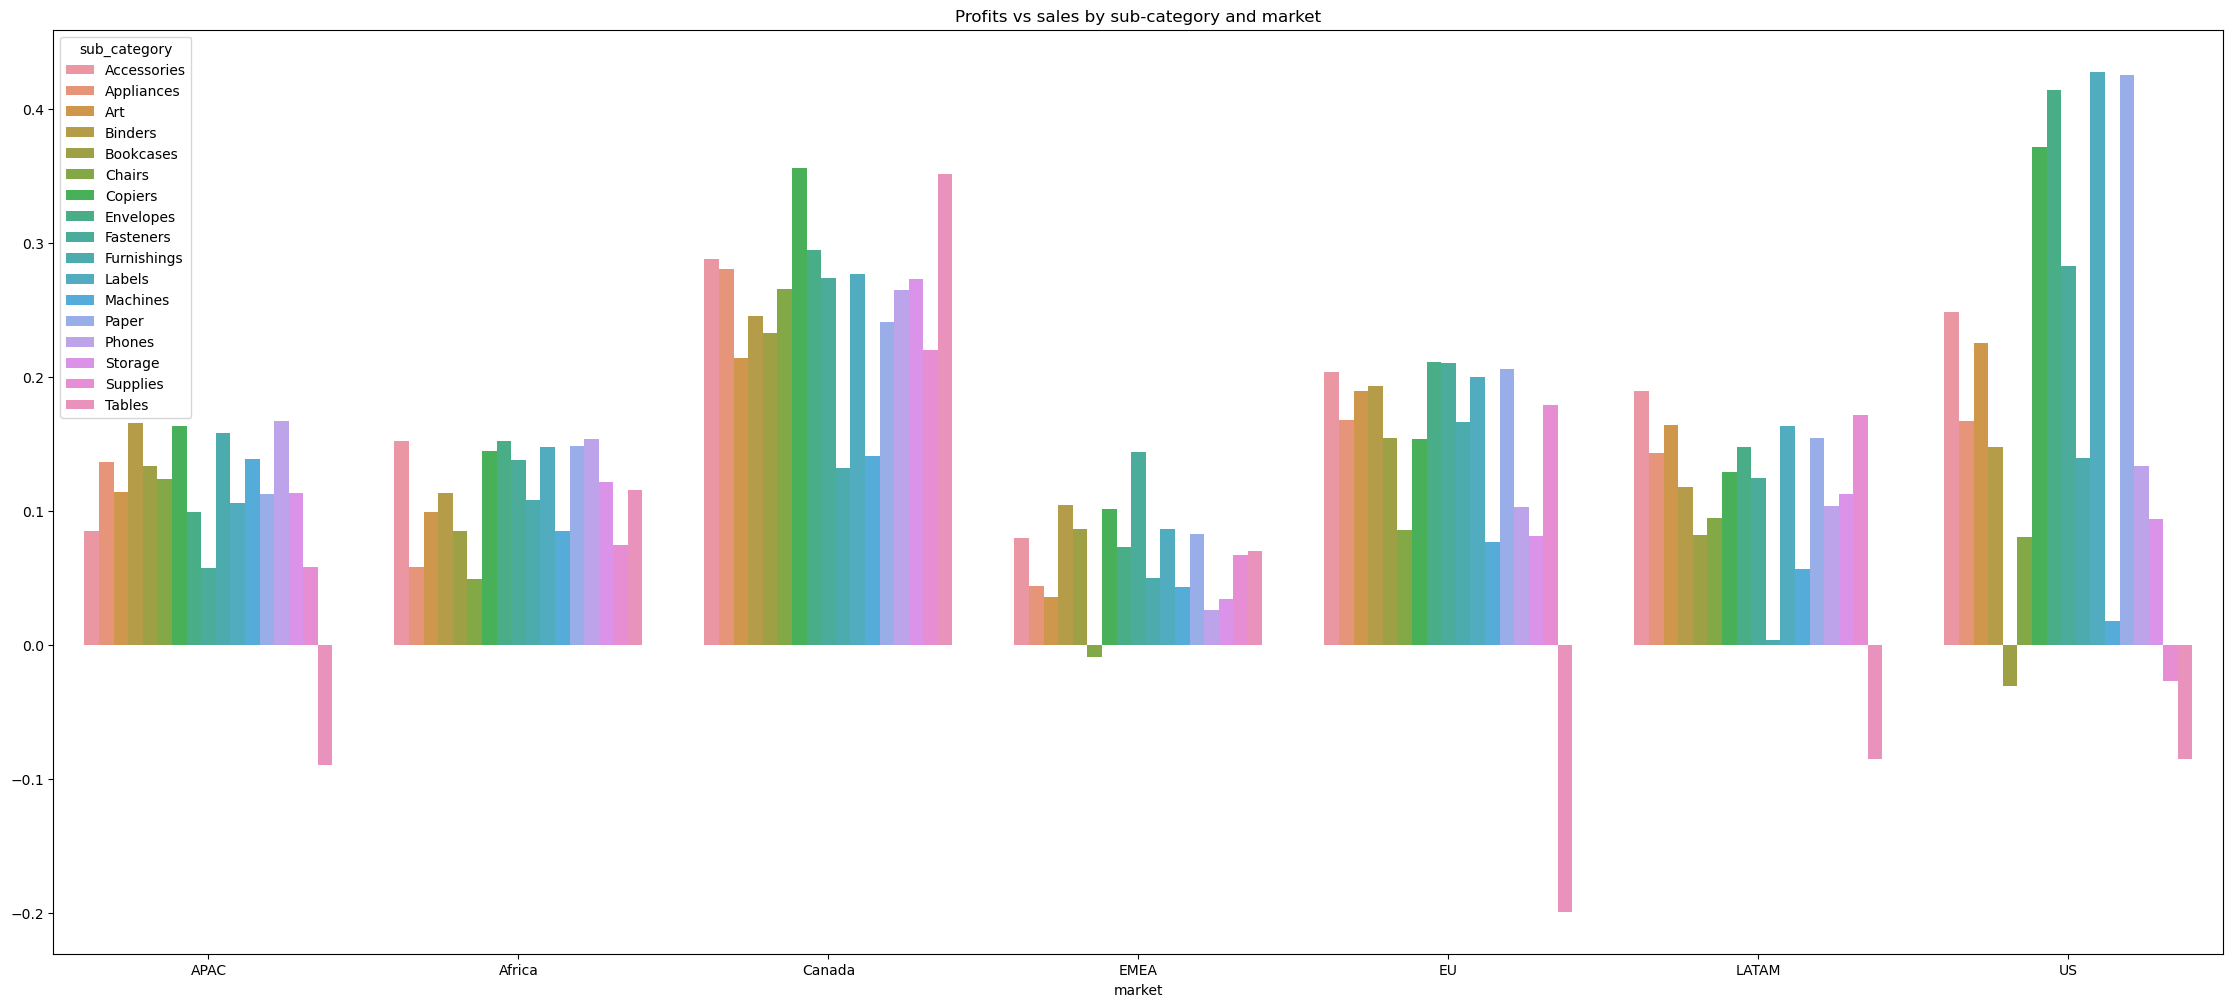

In [32]:
#profits-to-sales by sub-category and market overall 
profit_sales_market = profitable_cat_market['profit'] / selling_cat_market['sales']
plt.figure(figsize=[28,12])
sns.barplot(x=selling_cat_market['market'], y=profit_sales_market, hue=profitable_cat_market['sub_category']).set_title("Profits vs sales by sub-category and market")
plt.show()

The strongest profit-to-sales ratio overall is visible in Canada, with the other markets keeping positive for all sub-categories, except Tables for the APAC, US, LATAM, EU markets, Supplies and Bookcases in the US, Chairs in EMEA, and extremely low ratio for Furnishings in LATAM.

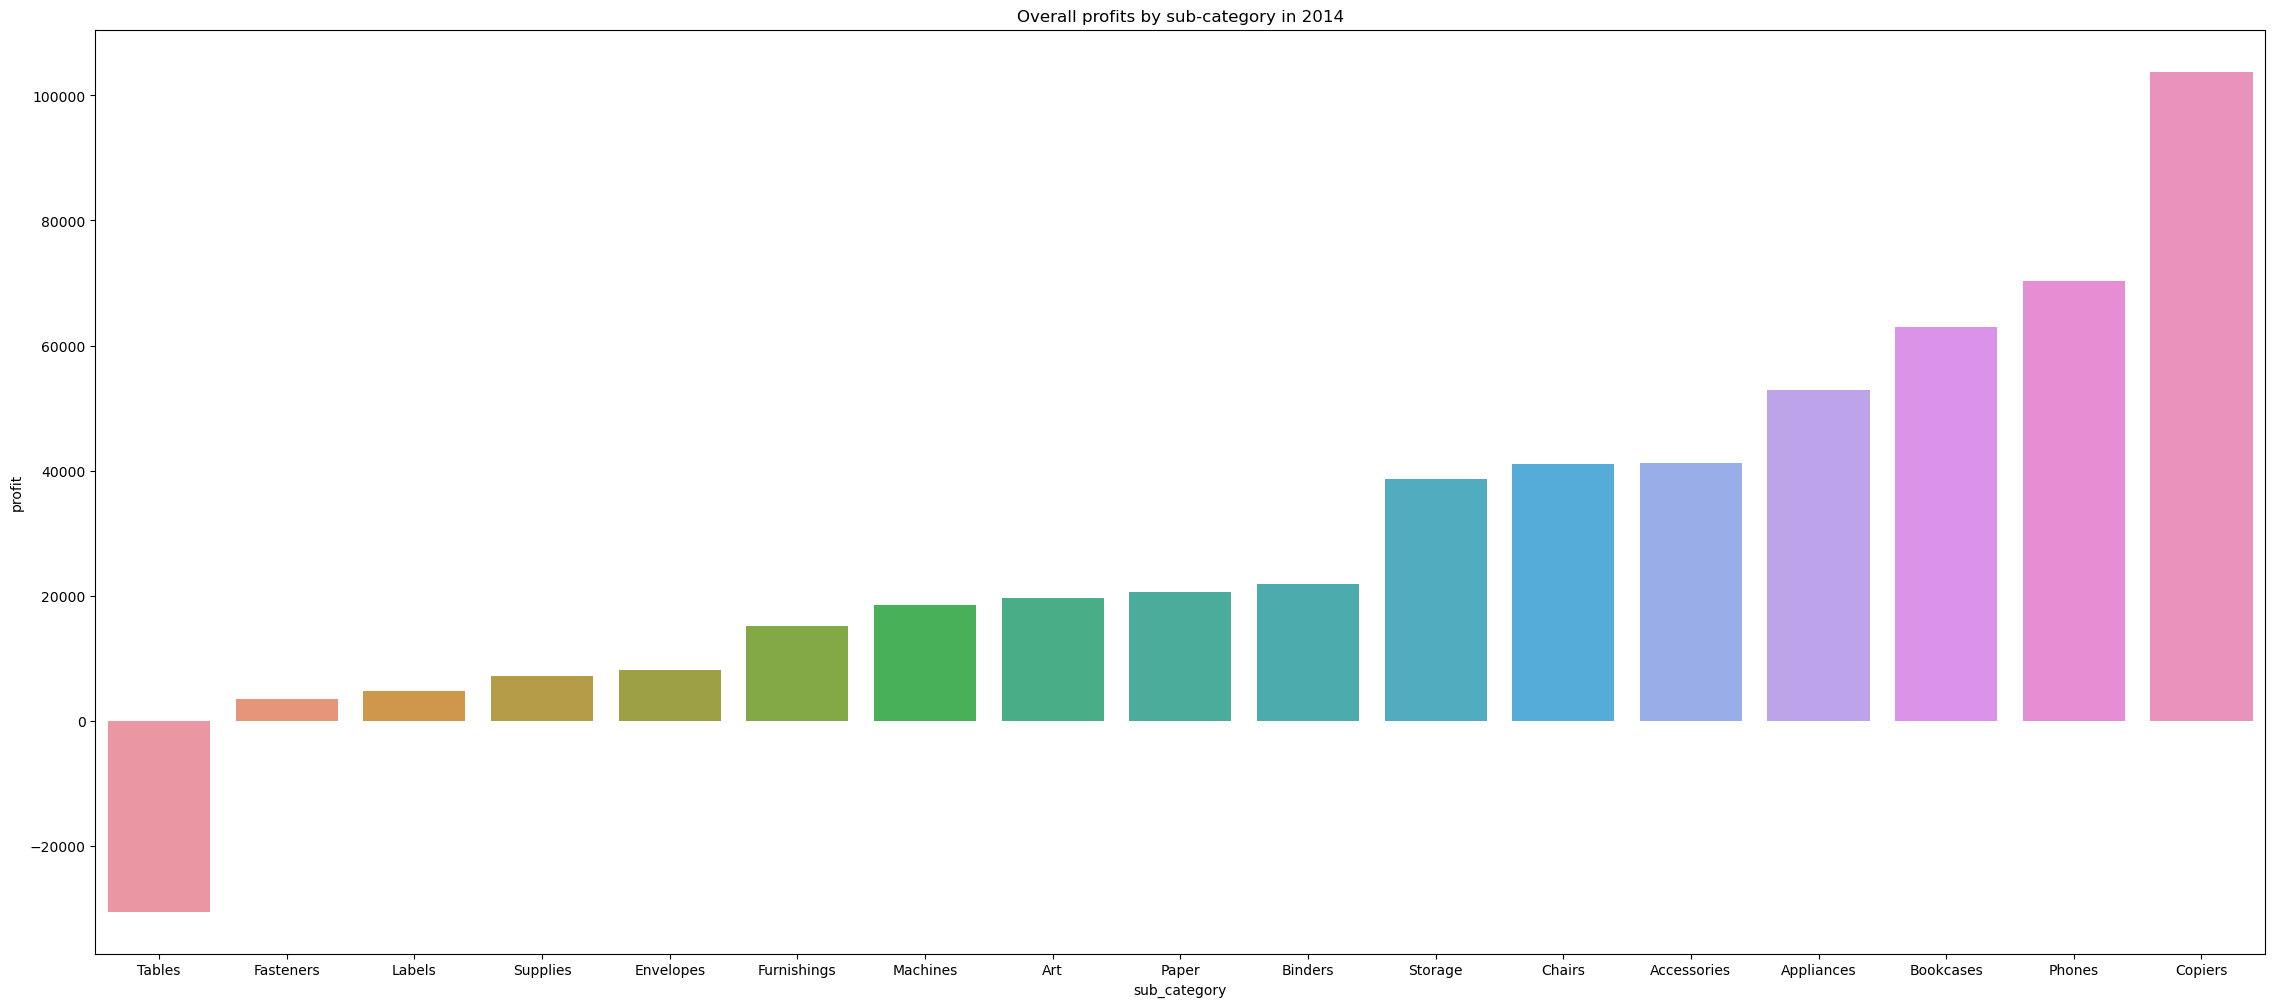

In [33]:
#as profits have the most dramatic discrepancy with sales in 2014, it may prove useful to analyse profits and sales by sub-category of goods in 2014
profitable_cat_2014 = super_data.groupby(['year', 'sub_category'])['profit'].sum().reset_index()
plt.figure(figsize=[28,12])
sns.barplot(data=profitable_cat_2014[profitable_cat_2014['year'] == 2014].sort_values(by='profit'), x='sub_category', y='profit').set_title("Overall profits by sub-category in 2014")
plt.show()

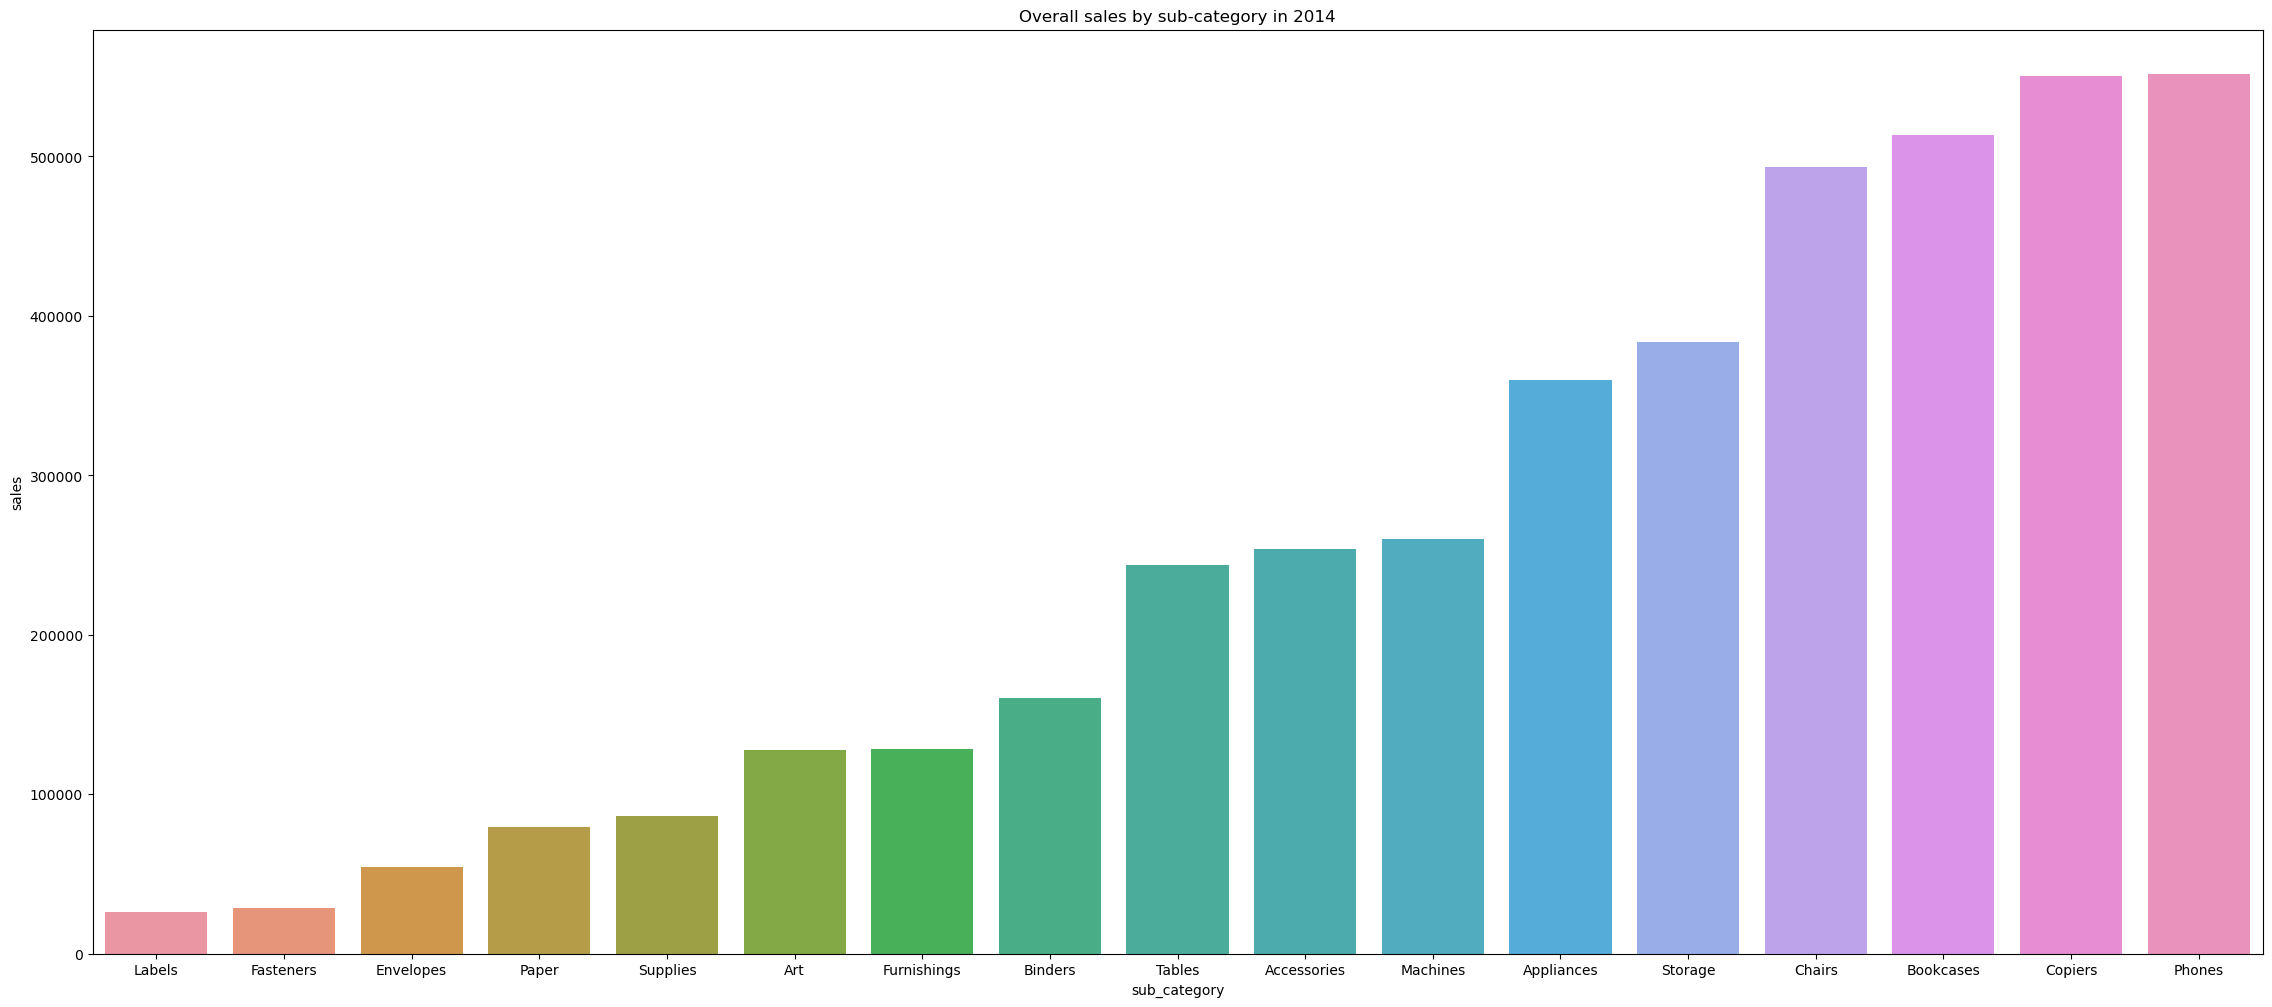

In [34]:
sold_cat_2014 = super_data.groupby(['year', 'sub_category'])['sales'].sum().reset_index()
plt.figure(figsize=[28,12])
sns.barplot(data=sold_cat_2014[sold_cat_2014['year'] == 2014].sort_values(by='sales'), x='sub_category', y='sales').set_title("Overall sales by sub-category in 2014")
plt.show()

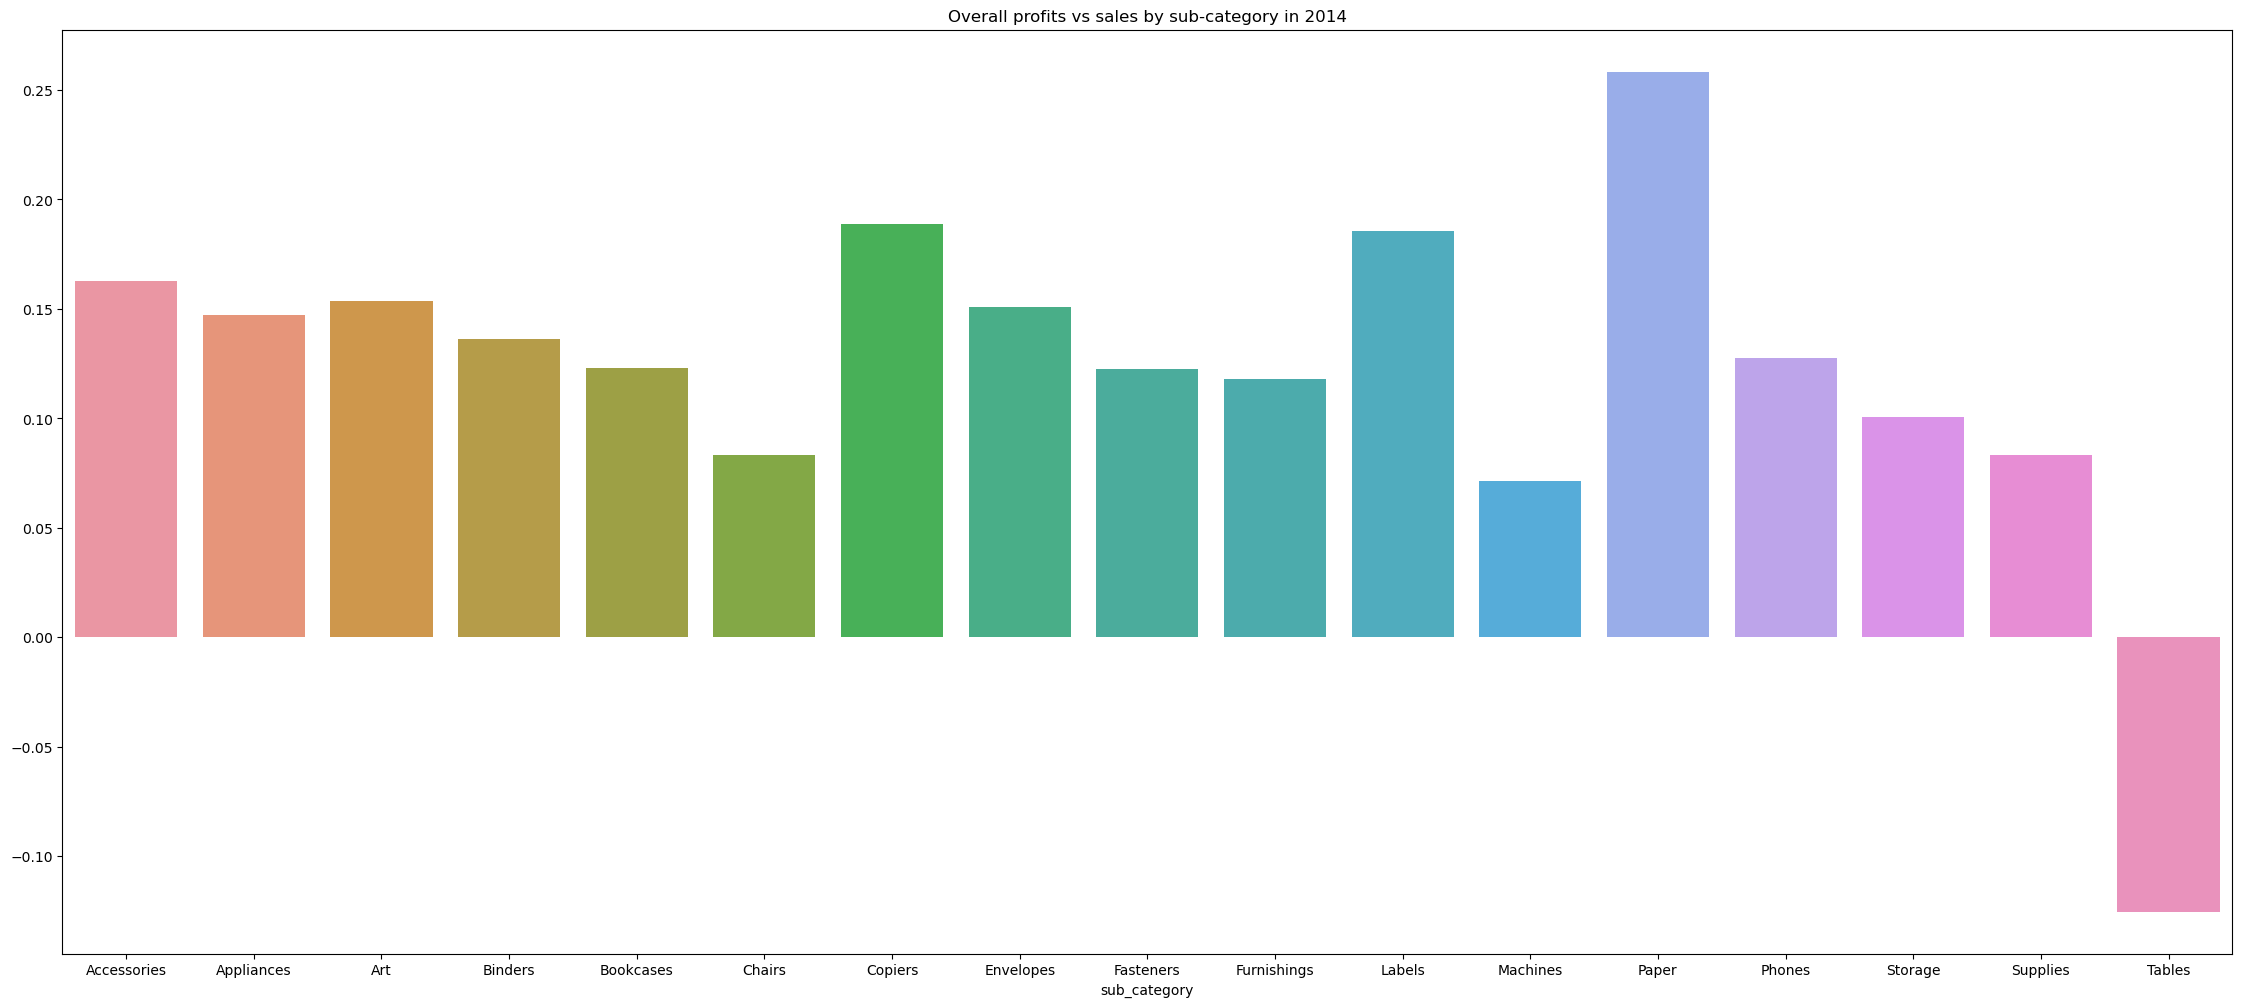

In [35]:
ratio_2014 = profitable_cat_2014[profitable_cat_2014['year'] == 2014]['profit'] / sold_cat_2014[sold_cat_2014['year'] == 2014]['sales']
plt.figure(figsize=[28,12])
sns.barplot(x=profitable_cat_2014['sub_category'], y=ratio_2014).set_title("Overall profits vs sales by sub-category in 2014")
plt.show()

Labels, Fasteners and Supplies show both low sales and low profits. Profit from Tables remains below zero, whereas there are healthy sales.
In terms of the ratio, only two sub-categories - Chairs and Machines - go under 0.1, and Tables show a negative one.

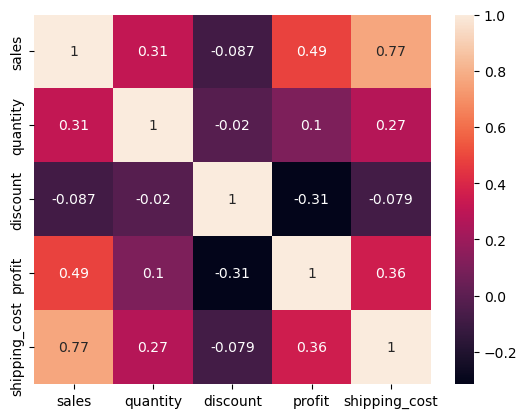

In [36]:
#more columns for analysis, based on correlation with sales and profits - quantity, shipping cost, and discount
#no influence possible on quantity, others - to be analysed
corr_a = super_data.corr()
sns.heatmap(corr_a, annot=True)
plt.show()

In [37]:
super_data

,ï»¿order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-DraÃ¢,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0,0.20,Medium,2014


As can be seen from the charts, sub-categories with the biggest discounts (above 30%) have the biggest loss in profit. Moreover, sales remain strong for items with the smallest discounts, and profits remain above zero for non-discounted items. All sub-categories, except Envelopes and Furnishings, show growth in 2014. Therefore, discounts are likely to damage profits but do not guarantee an increase in sales.

# Summary observations and suggestions

To decrease the running gap between sales and profits for SuperStore, there are a number of measures that can be taken to boost company earnings in underperforming regions and markets, focusing specifically on countries that show the worst profit-to-sales correlation, and the disproportionally high shipping prices for those regions and countries. 

Additionally, customer engagement can be improved by targeting corporate and home office segments. While not the majority, they account for a healthy ratio of correlation between profits and sales both in regional and market statistics, and can further increase the sales and profits of such sub-categories of goods as phones, chairs, paper and art.

There are several sub-categories of goods that can either be cut from the inventory or less heavily discounted. This includes tables, binders, labels, fasteners and envelopes that show poor performance across regional and market analyses. Discounts themselves do not influence sales in a meaningful way but significantly reduce profits.

# Assignment 3

# #1. Machine Learning Technique Selection and Justification:
#Dataset Characteristics:

#Features: Various attributes like 'Category', 'Sub-Category', 'Discount', 'Profit', etc.

#Target Variable: 'Sales' - the amount of sales for an order.

#Technique Selection:

# Linear Regression: 
#A suitable choice when there may be a linear relationship between features and the target variable.

#            Justification:

#The linear regression model assumes a linear relationship between the independent features and the target variable, which is reasonable to explore when predicting sales amounts.

# Task 2
# Pipeline explanation
# Preprocessing steps

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns in super_data.columns:
    if super_data[columns].dtype == 'object' or super_data[columns].dtype == 'category':
        super_data[columns] = le.fit_transform(super_data[columns])
super_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿order_id     51290 non-null  int32  
 1   order_date      51290 non-null  int32  
 2   ship_date       51290 non-null  int32  
 3   ship_mode       51290 non-null  int32  
 4   customer_name   51290 non-null  int32  
 5   segment         51290 non-null  int32  
 6   state           51290 non-null  int32  
 7   country         51290 non-null  int32  
 8   market          51290 non-null  int32  
 9   region          51290 non-null  int32  
 10  product_id      51290 non-null  int32  
 11  category        51290 non-null  int32  
 12  sub_category    51290 non-null  int32  
 13  product_name    51290 non-null  int32  
 14  sales           51290 non-null  int64  
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [39]:
#Drop useless columns
super_data.drop(["ï»¿order_id","customer_name","country","product_id","product_name"],axis=1,inplace=True)

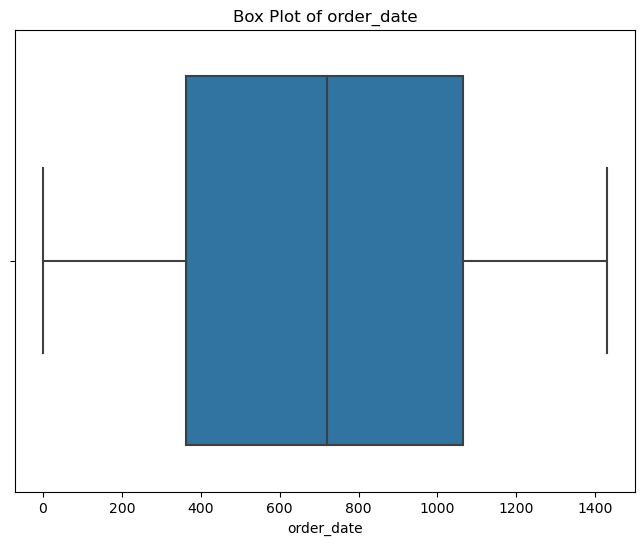

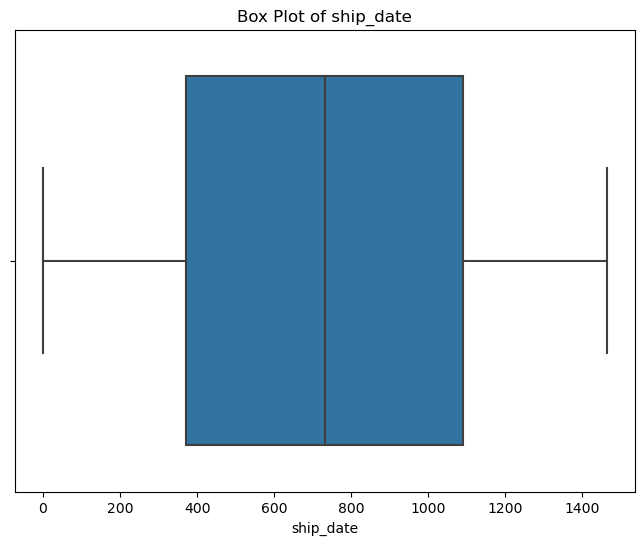

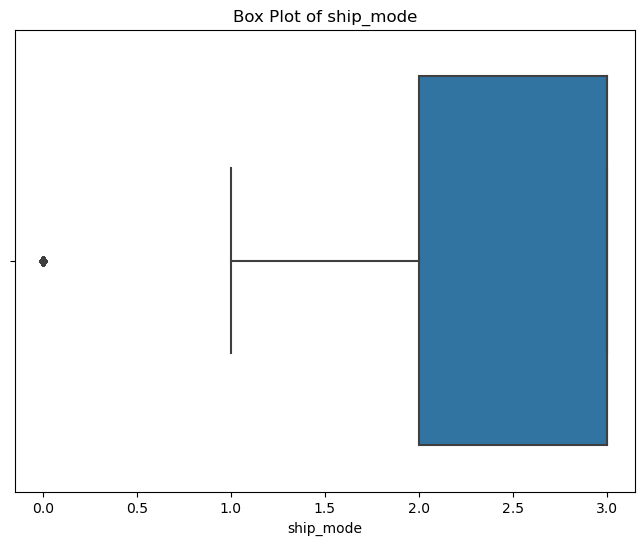

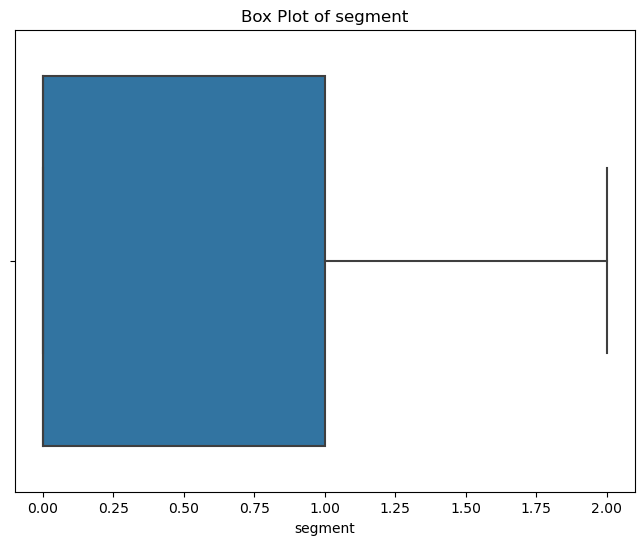

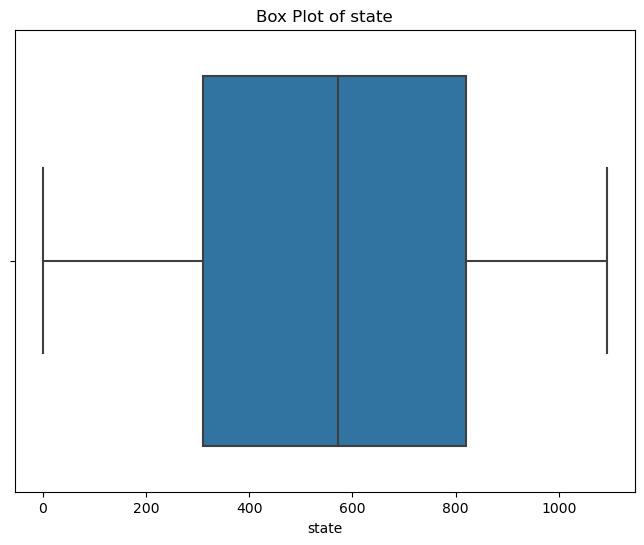

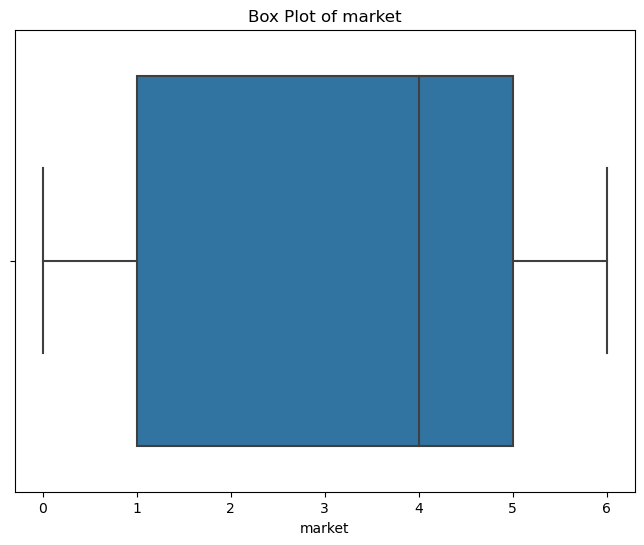

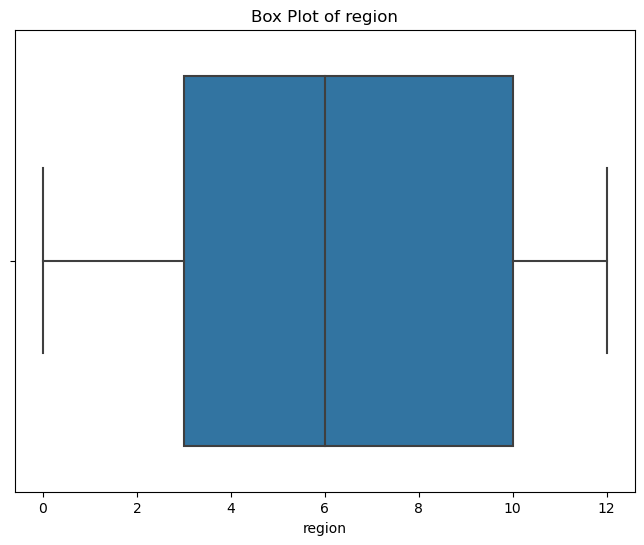

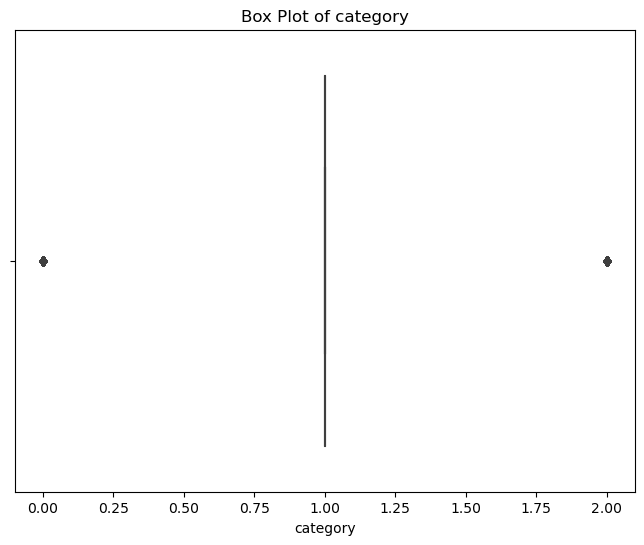

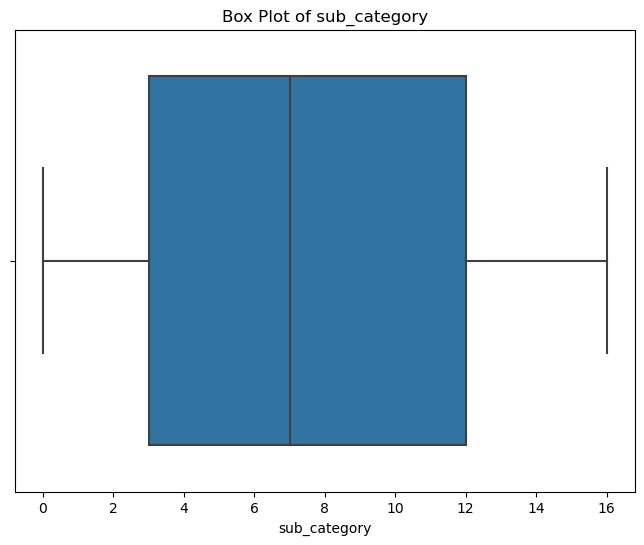

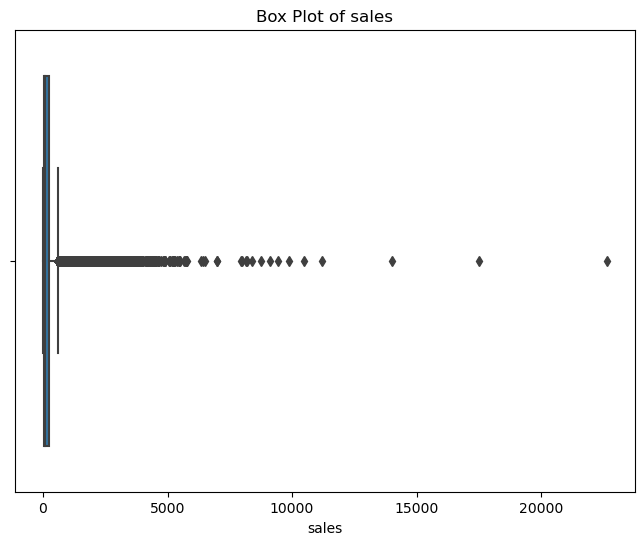

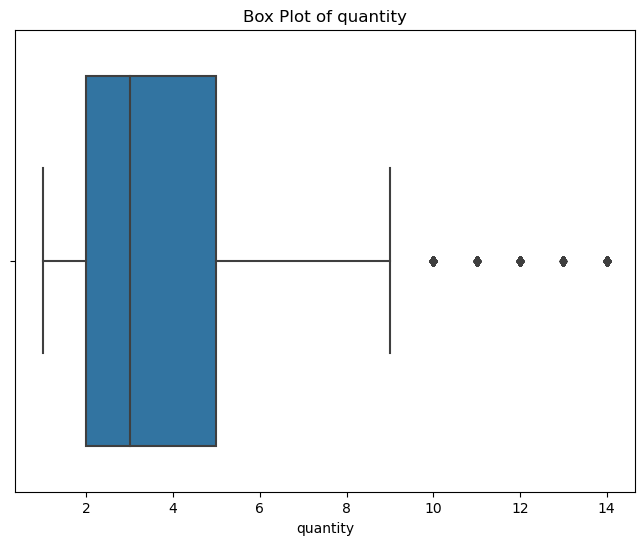

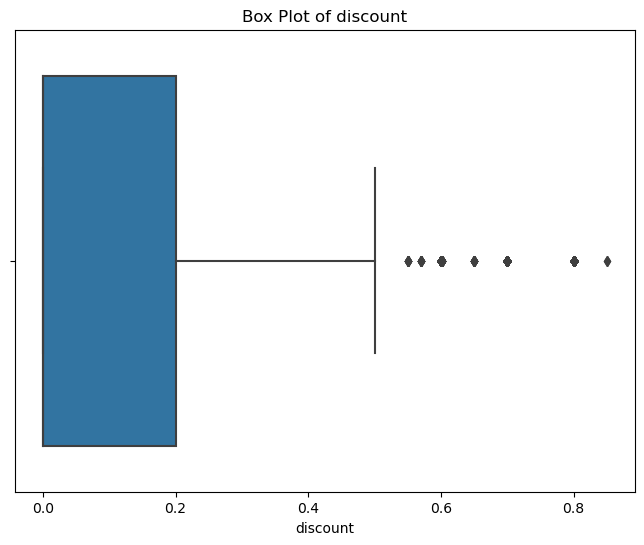

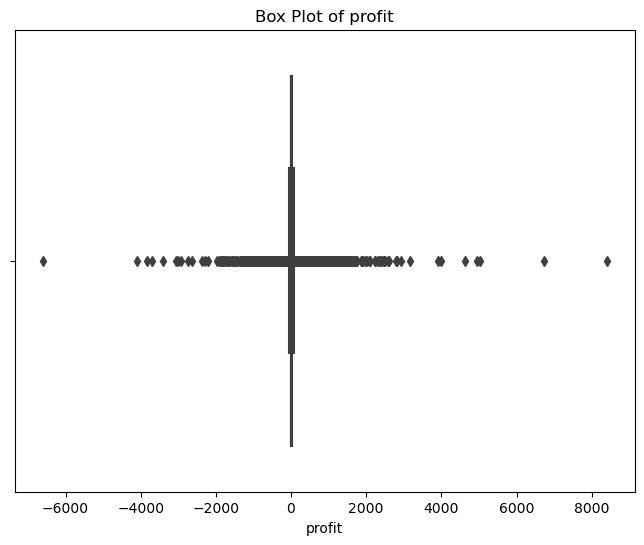

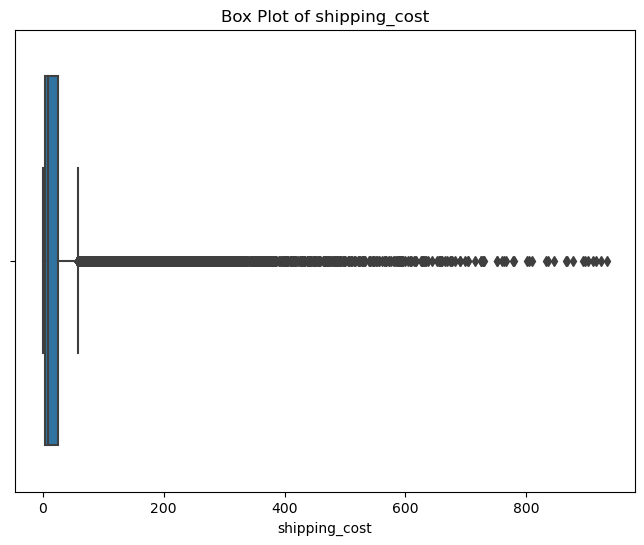

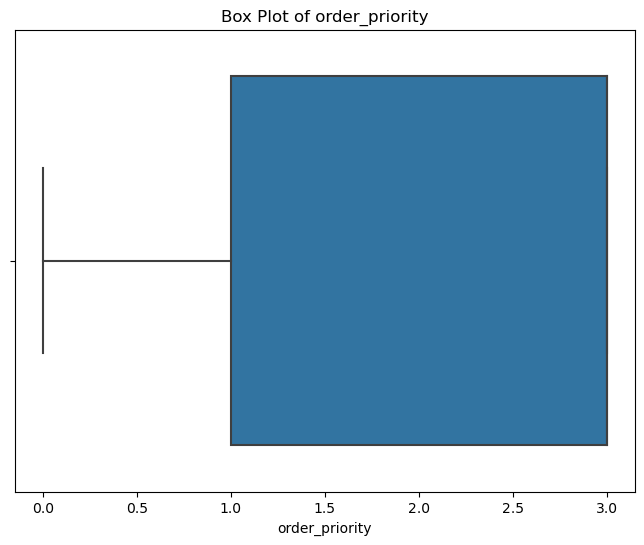

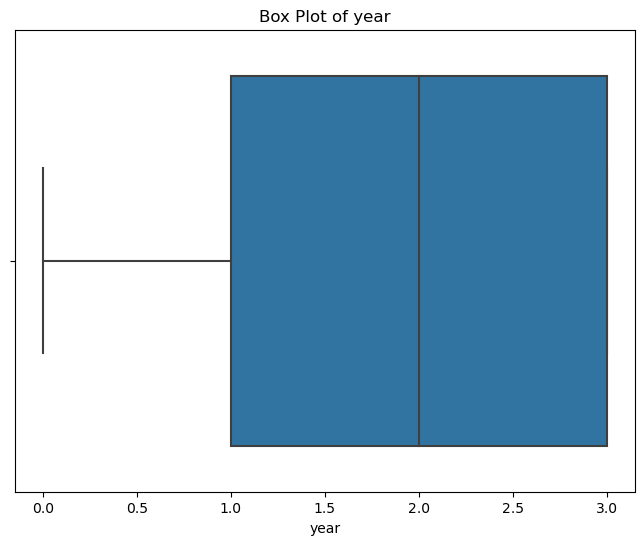

In [40]:
for column in super_data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=super_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [41]:
super_data["order_date"] = pd.to_datetime(super_data["order_date"])
super_data["ship_date"] = pd.to_datetime(super_data["ship_date"])

In [42]:
super_data["Delivery time (Days)"] = abs((super_data["ship_date"]- super_data["order_date"]) / np.timedelta64(1, 'D'))

In [43]:
super_data.drop(["order_date","ship_date"],axis=1,inplace=True)


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer

X = super_data.drop('sales',axis=1)
y = super_data['sales']

# Standardize the data before applying PCA
scaler = StandardScaler()
X_stand = scaler.fit_transform(X)

X_stand_df = pd.DataFrame(X_stand)

In [45]:
y_array = y.to_numpy()
y_2darray =y_array.reshape(-1,1)

In [46]:
Y_stand = scaler.fit_transform(y_2darray)
Y_stand_df = pd.DataFrame(Y_stand)

# Model Selection

In [48]:
# Assuming you chose Linear Regression as the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_stand, y_train)


NameError: name 'y_train' is not defined

# Training, Testing and Validation

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stand_df,Y_stand_df, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined

def calculate_metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test) * 100

    return mse, rmse, r2, accuracy

# List of models
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=42, n_jobs=-1),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
]

model_names = ["LinearRegression", "RandomForestRegressor", "KNeighborsRegressor", "DecisionTreeRegressor", "GradientBoostingRegressor"]

# Evaluate models and collect metrics
metrics_list = []

for model, name in zip(models, model_names):
    mse, rmse, r2, accuracy = calculate_metrics(model, X_train, X_test, y_train, y_test)
    metrics_list.append({
        'Modelling Name': name,
        'MSE': mse,
        'RMSE': rmse,
        'Test R2': r2,
        'Accuracy': accuracy
    })

# Create a DataFrame to display the results
model_report = pd.DataFrame(metrics_list)
print(model_report)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model_report' DataFrame is already defined

# Set the style for better visualization
sns.set(style="whitegrid")

# Plot MSE
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelling Name', y='MSE', data=model_report)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()



In [ ]:
# Plot RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelling Name', y='RMSE', data=model_report)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()



In [ ]:
# Plot R2
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelling Name', y='Test R2', data=model_report)
plt.title('R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')
plt.show()



In [ ]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelling Name', y='Accuracy', data=model_report)
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()
